<a href="https://colab.research.google.com/github/Sudo343/ML-practice-projects/blob/main/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Data Set
### Abstract:
One dataset is included, related to red vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

## Wine Quality Datasets

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The data can be used to test (ordinal) regression or classification (in effect, this is a multi-class task, where the clases are ordered) methods. Other research issues are feature selection and outlier detection. The data includes two datasets:

winequality-red.csv - red wine preference samples;

Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). More details can be found at: http://www.vinhoverde.pt/en/

Data Set Characteristics:  Multivariate
	

Number of Instances: 4898
	

Area: Business

Attribute Characteristics: Real
	

Number of Attributes: 12
	
Date Donated: 2009-10-07

Associated Tasks: Classification, Regression
	
Missing Values? : N/A

[link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

### Data Set Information:

The two datasets are related to red variant of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information:

Input variables (based on physicochemical tests):

1.   fixed acidity
2.   volatile acidity
3.   citric acid
4.   residual sugar
5.   chlorides
6.   free sulfur dioxide
7.   total sulfur dioxide
8.   density
9.   pH
10.  sulphates
11.  alcohol

Output variable (based on sensory data):

12.  quality (score between 0 and 10)

### Objective of this Project
Here we have a multivariate dataset, all the features are continuous numrical values, the target variable is the quality on scale discrete values from 1 to 10, so it is. We will use this data to build a model to classify new records.
we will use various machine learning techniques to build a model.

### Examine the data.
note that here we are working with one type of wine, red Wine.
loading the dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_redWine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                         delimiter = ';')

df_redWine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

now let us explore this table.

In [ ]:
df_redWine.shape

(1599, 12)

here we see that there are 1599 records. we have 12 attributes. let us examine them.

In [ ]:
df_redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let us see if we have any missing values in this dataset.

In [ ]:
print( df_redWine.isnull().values.sum())

0


so no missing values. 

here all the predictor attributes are continuous numerical values.

our target variable is 'quality'. we see that it has discrete integer values. we shall use classification techniques to , so it's a categorical ordinal variable.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

let us visualize this data.  
let us look at the distribution of quality index over the records we have.

In [ ]:
df_redWine.groupby('quality', sort=True).count()

fixed acidity  volatile acidity  citric acid  ...   pH  sulphates  alcohol
quality                                                ...                         
3                   10                10           10  ...   10         10       10
4                   53                53           53  ...   53         53       53
5                  681               681          681  ...  681        681      681
6                  638               638          638  ...  638        638      638
7                  199               199          199  ...  199        199      199
8                   18                18           18  ...   18         18       18

[6 rows x 11 columns]

Here we see that the classes are not uniformly represented, this is something we to address while making models. Let us visualize this result.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


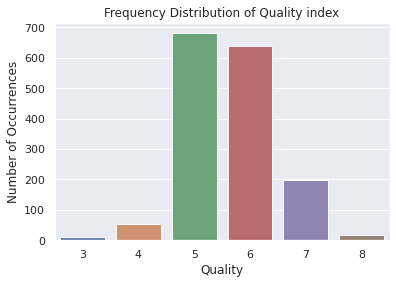

In [ ]:
Quality_count = df_redWine['quality'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Quality_count.index, Quality_count.values, alpha=0.9)
plt.title('Frequency Distribution of Quality index')
plt.ylabel('Number of Occurrences', fontsize=12)
# plt.grid(True)
plt.xlabel('Quality', fontsize=12)
plt.show()

One way to visualize the relations between each of these features is to plot them together.

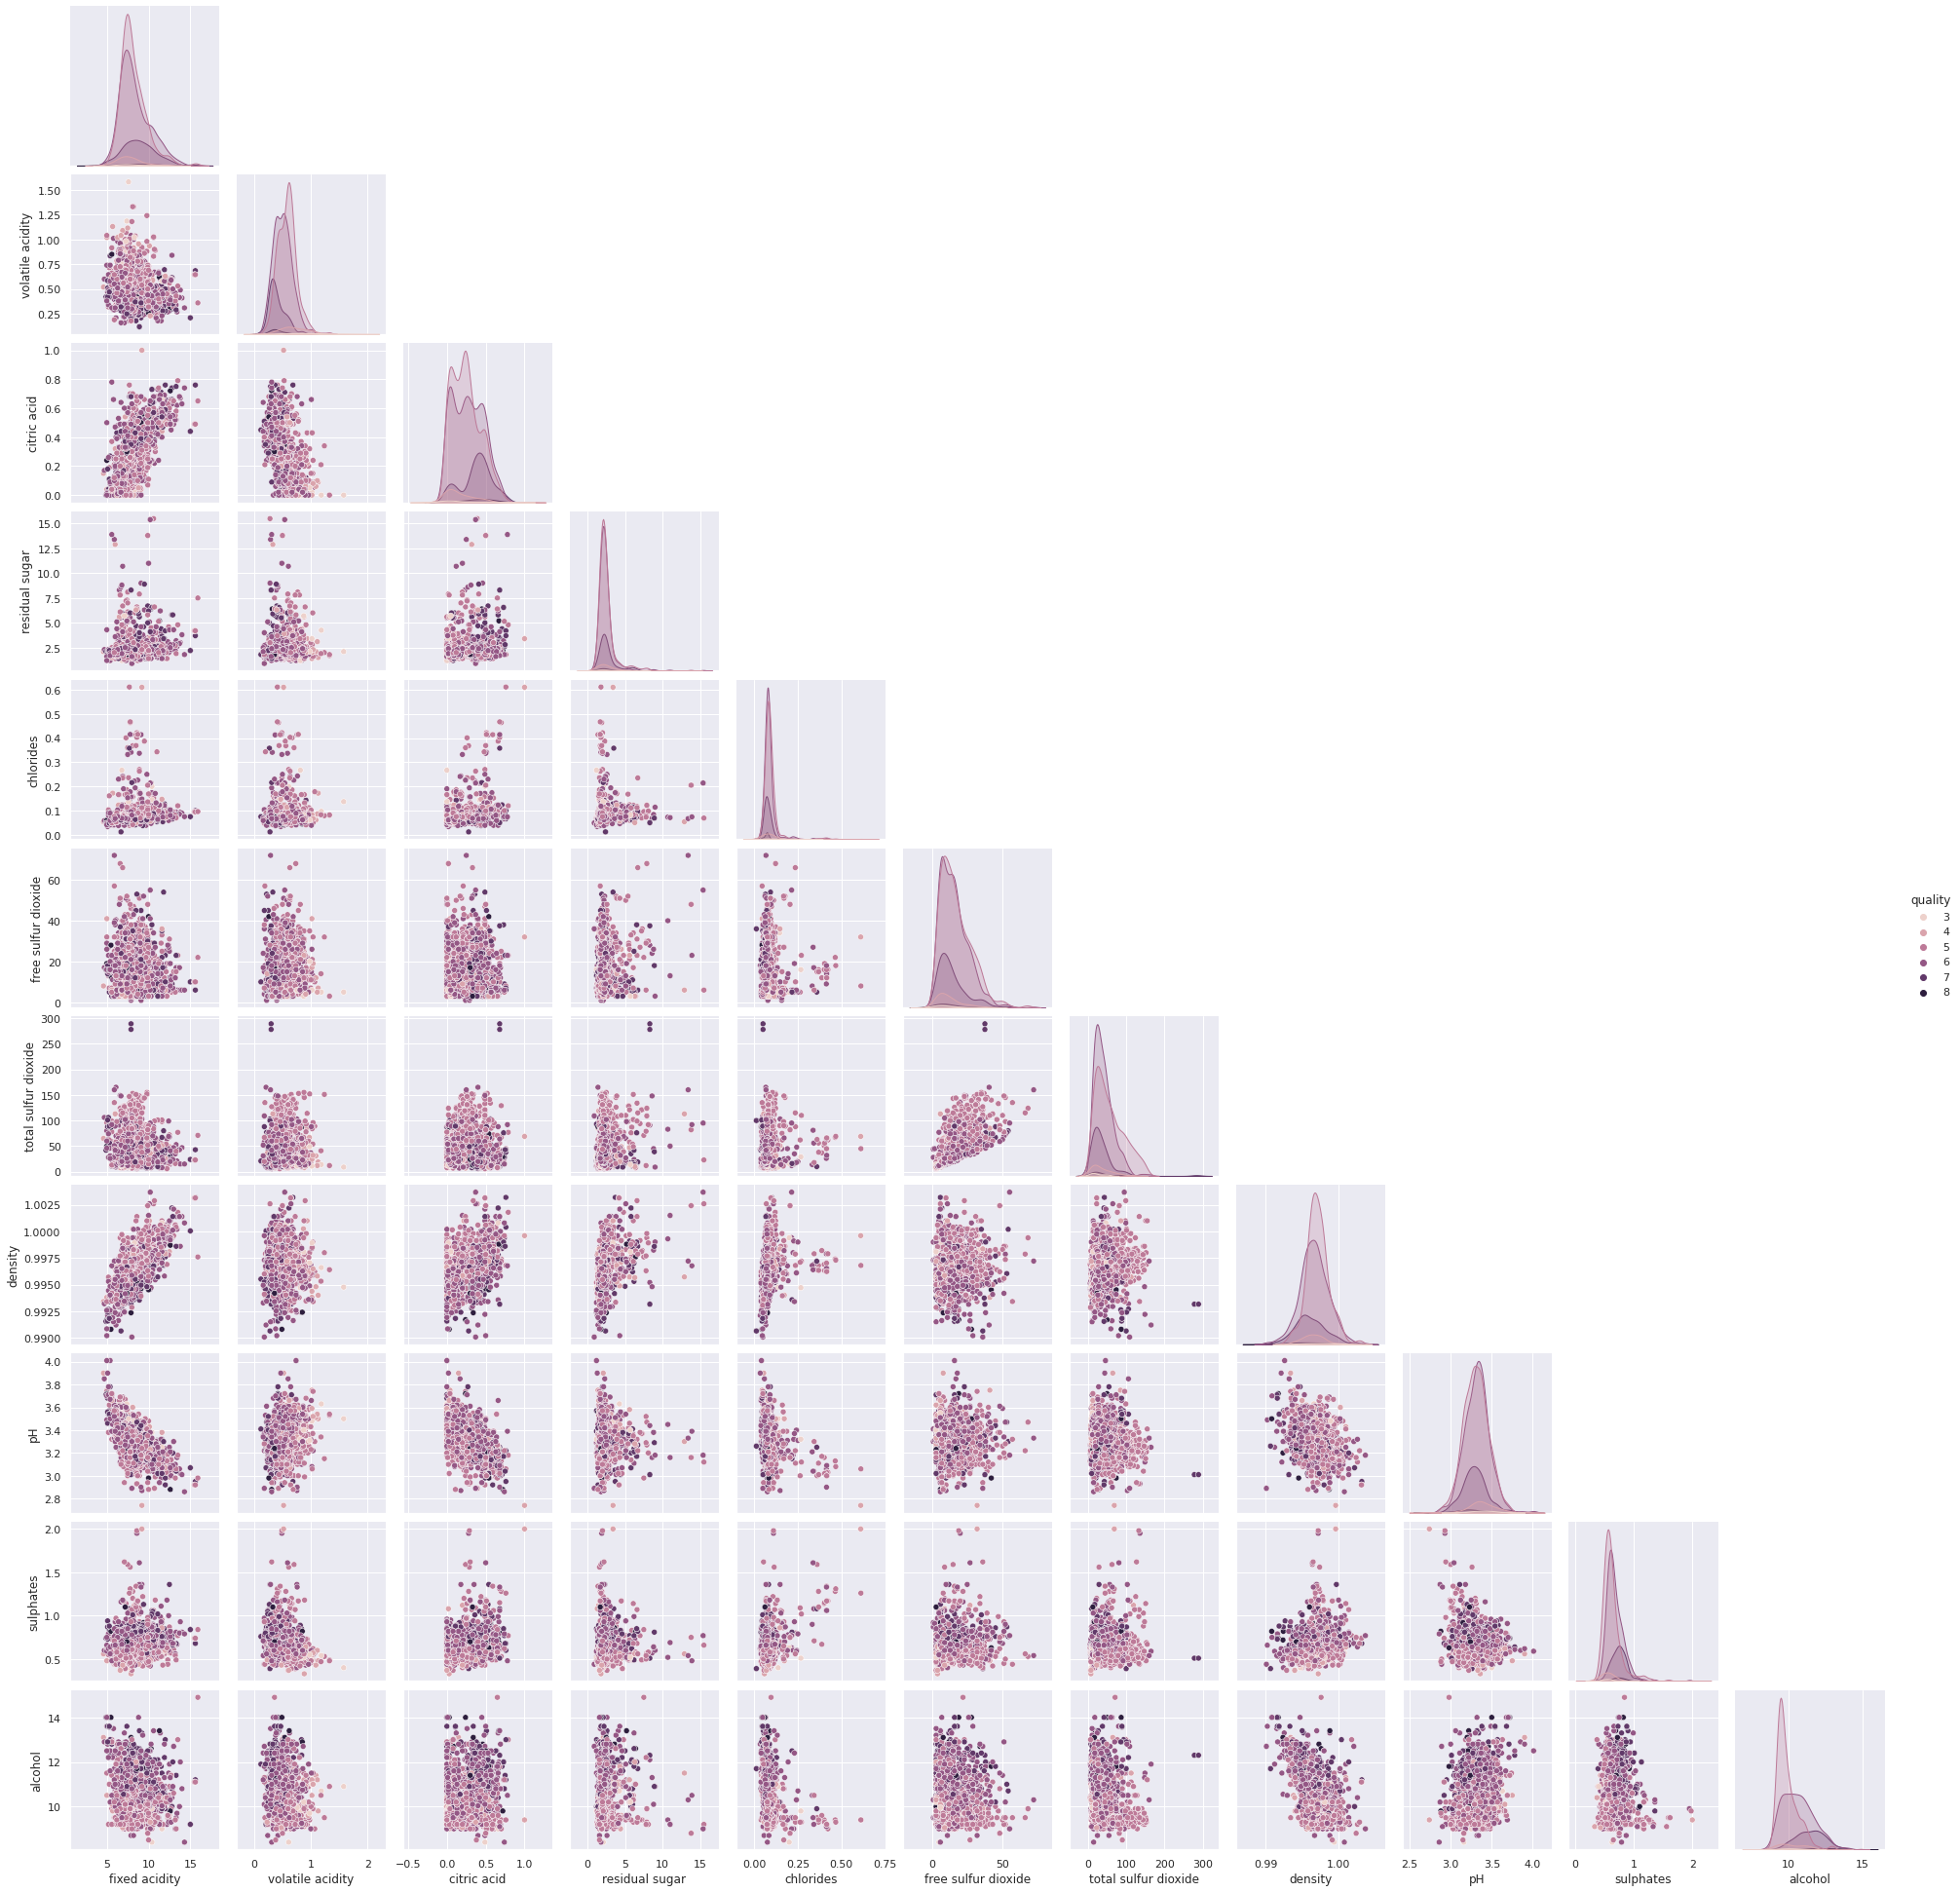

In [ ]:
sns.pairplot( df_redWine,
             hue = 'quality',
             kind = 'scatter',
             corner = True)

we see here that linear classifier will not work very well. but lets try again after scaling and normalising these values.

here we see that data points are crowded, it seems linear classifiers won't do well here, may be it will with hyperplanes.

Let us explore the arrangement of our data.

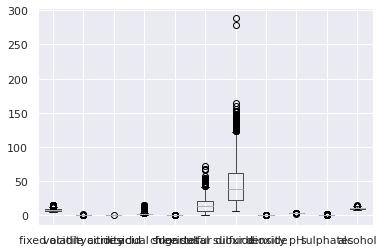

In [ ]:
pd.DataFrame(df_redWine.drop( columns='quality')).boxplot()
# these boxplots are for standardised and scaled values
# df_redWine.info()

the distributions are not clear here. this is because the values are spread out in very diverse scales. Let's try something else.

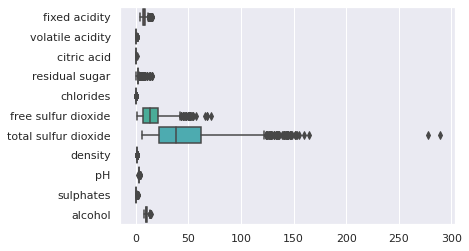

In [ ]:
sns.boxplot(data = df_redWine.drop( columns='quality'), orient="h")

the features are spread out on such wide range, we are better off looking at them individually.

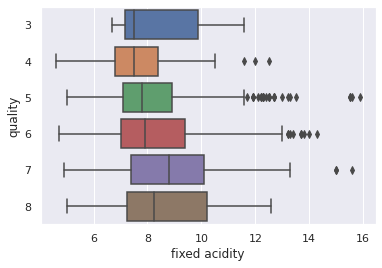

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[0], y ='quality', orient="h")
# import matplotlib.axes as plt

Here, we see that this feature is spread out for every 'quality'.

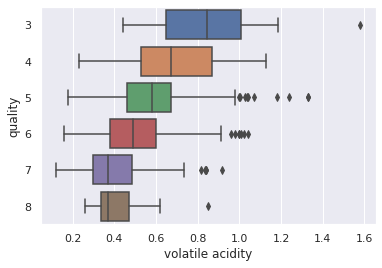

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[1],y= 'quality', orient="h")

We see a pattern here, we see that higher values of 'volatile acidity' are rarely found in high quality wine.

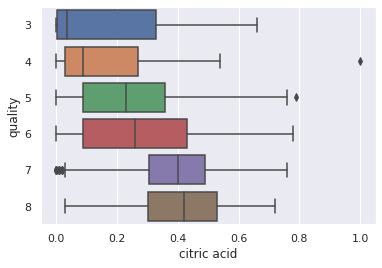

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[2], y ='quality', orient="h")

Another trend with citric acid, high 'quality' wines are more likely to have higher 'citric acid' concentration.

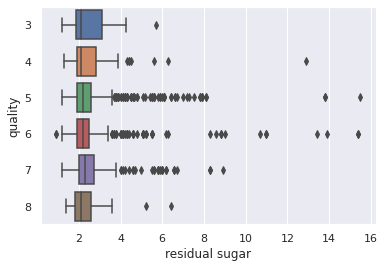

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[3], y ='quality', orient="h")

Not much can be said about this feature, the mediocre 'quality' wines seem to have relatively higher amounts of 'residual sugar'.

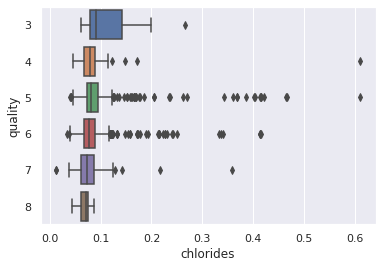

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[4], y ='quality', orient="h")

Nothing much can be said here. the extremes of 'quality' seem to affected by this, but there are various other features that may be playing a bigger role here.

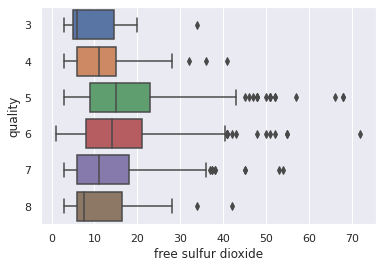

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[5], y ='quality', orient="h")

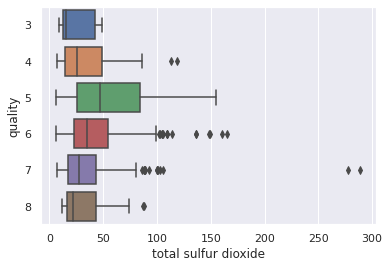

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[6], y ='quality', orient="h")

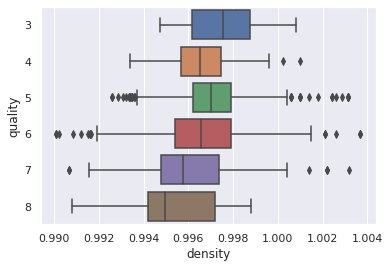

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[7], y ='quality', orient="h")

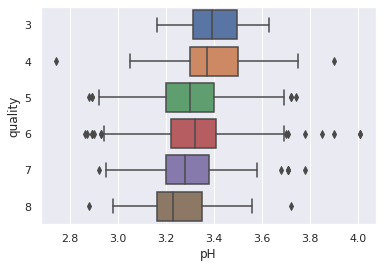

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[8], y ='quality', orient="h")

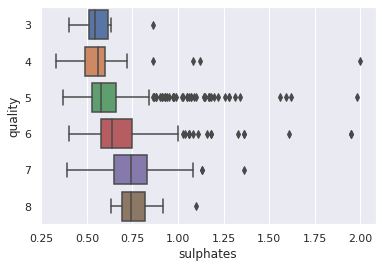

In [ ]:
sns.boxplot(data = df_redWine, x = df_redWine.columns[9], y ='quality', orient="h")

one can see that sulphates are more likey to be present in high 'quality' wines.
here we see various outliers, one is tempted to remove them but the may have importance in detemining good model.

Here we need to work on this data to prepare it for modelling. Let us start the data preprocessing.

## Data Preprocessing
### Standard Scaling of features.

When we want to transform a feature to have a mean of 0 and a standard deviation of 1.
rescaling of features
to be approximately standard normally distributed. To achieve this, we use
standardization to transform the data such that it has a mean, x̄, of 0 and a standard
deviation, σ, of 1. Specifically, each element in the feature is transformed so that:


```
 x′[i] = (x[i] − mean) / σ
```

where x’[i] is our standardized form of x[i]. The transformed feature represents the number
of standard deviations the original value is away from the feature’s mean value
(also called a z-score in statistics).

Standardization is a common go-to scaling method for machine learning preprocessing. But whether it will help in building a good model depends on the algorithm one uses.

In [ ]:
#create arrays with features & target variables
y = df_redWine['quality'].values
X = df_redWine.drop('quality', axis=1).values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

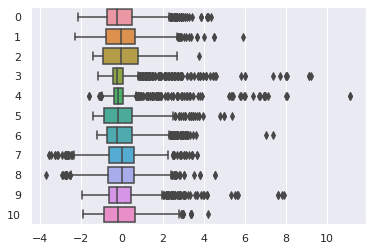

In [ ]:
sns.boxplot(data = X_std, orient="h")
# these boxplots are for standardised and scaled values

we see that there are various outliers here. here we also note that there means are set around 0.

Let's use another technique.

### Normalized Features.

here we rescale the feature values of observations to have unit norm (a total length of 1). This type of rescaling is often used when we have many equivalent features. we can also rescale across individual observations. Normalizer rescales the values on individual observations to have unit norm (the sum of their
lengths is 1).

Normalizer provides three norm options with Euclidean norm (often called L2). Intuitively, L2 norm can be thought of as the distance between two points. the type of norm one takes depends how different models made using different algorithms will perform.


In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

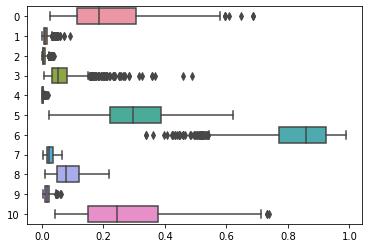

In [ ]:
sns.boxplot(data = X_norm, orient="h")
# these boxplots are for normalized values

We will be using these later in our models.

### Feature Selection & Reduction
Now, let's select best features for our models. 

one way to do so is to identify highly correlated features. we choose either of them for training because they contain similar information and keeping both of them is redundant.

In [ ]:
# creating correlation table of the features
corr_matrix = df_redWine.drop( columns = 'quality').corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

corr_matrix

fixed acidity  volatile acidity  ...  sulphates   alcohol
fixed acidity              1.000000          0.256131  ...   0.183006  0.061668
volatile acidity           0.256131          1.000000  ...   0.260987  0.202288
citric acid                0.671703          0.552496  ...   0.312770  0.109903
residual sugar             0.114777          0.001918  ...   0.005527  0.042075
chlorides                  0.093705          0.061298  ...   0.371260  0.221141
free sulfur dioxide        0.153794          0.010504  ...   0.051658  0.069408
total sulfur dioxide       0.113181          0.076470  ...   0.042947  0.205654
density                    0.668047          0.022026  ...   0.148506  0.496180
pH                         0.682978          0.234937  ...   0.196648  0.205633
sulphates                  0.183006          0.260987  ...   1.000000  0.093595
alcohol                    0.061668          0.202288  ...   0.093595  1.000000

[11 rows x 11 columns]

this here is a 11X11 with the absolute correlation values. here we need to remove either of the features with correlation above a certain value.

In [ ]:
#set limit on 0.95, 0.9, 0.85
Lt = 0.85
# any smaller than that will not be correct, because we are interested in removing highly-correlated features

In [ ]:
# Find index of feature columns with correlation greater than Lt
to_drop = [column for column in upper.columns if any(upper[column] > Lt)]

# Drop features
df_redWine.columns[to_drop]

Index([], dtype='object')

it seems we can't drop anything. even going as low as 0.85 was not good enough.

Let's try this again on normalized dataset.

In [ ]:
# creating correlation table of the features
# here we choose the normalised dataset we made above, which will be better for this
corr_matrix = pd.DataFrame(X_norm[:,:10]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

corr_matrix

0         1         2  ...         7         8         9
0  1.000000  0.627753  0.724571  ...  0.915774  0.881637  0.860481
1  0.627753  1.000000  0.059069  ...  0.781115  0.800244  0.593022
2  0.724571  0.059069  1.000000  ...  0.517412  0.463191  0.600323
3  0.671670  0.537311  0.455287  ...  0.690567  0.682428  0.619921
4  0.646766  0.556465  0.449716  ...  0.684582  0.670583  0.688686
5  0.172870  0.070073  0.210545  ...  0.102471  0.083831  0.089703
6  0.845822  0.638355  0.545821  ...  0.886322  0.877720  0.793771
7  0.915774  0.781115  0.517412  ...  1.000000  0.995298  0.892708
8  0.881637  0.800244  0.463191  ...  0.995298  1.000000  0.880732
9  0.860481  0.593022  0.600323  ...  0.892708  0.880732  1.000000

[10 rows x 10 columns]

this here is a 11X11 with the absolute correlation values.  these have been calculated from the normalized values. here we need to remove either of the features with correlation above a certain value.

In [ ]:
#set limit on 0.95, 0.9, 0.85
Lt = 0.9
# any smaller than that will not be correct, because we are interested in removing highly-correlated features

In [ ]:
# Find index of feature columns with correlation greater than Lt
to_drop = [column for column in upper.columns if any(upper[column] > Lt)]

# Drop features
#dataframe.drop(dataframe.columns[to_drop], axis=1).head(3)
df_redWine.columns[to_drop]

Index(['density', 'pH'], dtype='object')

It seems we can drop some features, 
they are:

*   density
*   pH

Let's create a different n-d array with this specification for later use. we will call it reduced1 from now on.

In [ ]:
df_reduced1 = df_redWine.drop( columns = df_redWine.columns[to_drop])
df_reduced1 = df_redWine.drop( columns = 'quality')
df_reduced1.head(3)

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8

[3 rows x 11 columns]

We can try other techniques for selecting useful features.

### Variance thresholding
Another one is to choose features with high variance, as they are more interesting and useful.

When we have a set of numerical features and want to remove those with low variance (i.e.,
likely containing little information).

It is motivated by the idea that features with low variance are likely less interesting (and
useful) than features with high variance.

it drops all features whose variance does not meet that threshold.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create thresholder
thresholder = VarianceThreshold(threshold=0.5)
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform( df_redWine.drop( columns='quality'))
# View high variance features
to_hold = thresholder.get_feature_names_out()
to_hold

array(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'], dtype=object)

these are the features we will keep in our new dataset, which we will call reduced2 from here on.

In [ ]:
df_reduced2 = df_redWine[ to_hold]
df_reduced2.head()

fixed acidity  residual sugar  ...  total sulfur dioxide  alcohol
0            7.4             1.9  ...                  34.0      9.4
1            7.8             2.6  ...                  67.0      9.8
2            7.8             2.3  ...                  54.0      9.8
3           11.2             1.9  ...                  60.0      9.8
4            7.4             1.9  ...                  34.0      9.4

[5 rows x 5 columns]

Here we have another dataset we select for our work.

Let's prepare them for modelling.
Convert the dataset into n-d numpy array. 
Let us scale and normalize this data.

In [ ]:
X_r1 = np.array(df_reduced1) # reduced1 dataset
X_r2 = np.array(df_reduced2)  # reduced2 dataset

# standardised & scaled
X_std_r1 = sc.fit_transform(X_r1)
X_std_r2 = sc.fit_transform(X_r2)

# normalized
X_norm_r1 = norm.fit_transform(X_r1)
X_norm_r2 = norm.fit_transform(X_r2)

 Let's start building models. 
 We want to build a classifier.
 
 lets try the K nearest neighbour algorithm to build a model to predict 'quality'

## KNeighbors classifier
 Let's start with KNeighbors classifier.

 The K-Nearest Neighbors classifier (KNN) is one of the simplest yet most commonly
used classifiers in supervised machine learning. KNN is often considered a lazy
learner; it doesn’t technically train a model to make predictions. Instead an observation
is predicted to be the class of that of the largest proportion of the k nearest observations.

We use Cross-validation for better models. We will be using this method from here on, as it gives better models, but at expense of time, because training a model this way is time consuming.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

On default setting weights, one of the arguements of this classifier, sets weights as 'uniform' giving each data point equal weight while classification.

In [ ]:
# create knn classifier with default arguments.
knn = KNeighborsClassifier()

# fit this model
cvscores_10 = cross_val_score( knn, X, y, cv=10)
print(np.mean(cvscores_10))

0.4459080188679246


  45% is not a good score. this model is not doing well, lets try more values of ' k ' and see if it works.

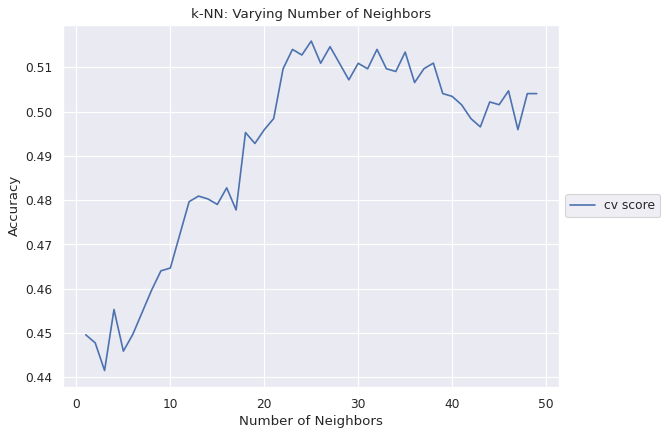

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 50
neighbors = np.arange(1, 50)
cv_scores = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    #knn.fit(X_train, y_train)
    cvscores_10 = cross_val_score( knn, X, y, cv=10)
    #print(np.mean(cvscores_20))
    cv_scores[i] = np.mean(cvscores_10) 

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, cv_scores, label = 'cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Slight improvement, but let's see if we can do better.
Let's try other optimised datasets for making a model.

here we use various datasets we created.

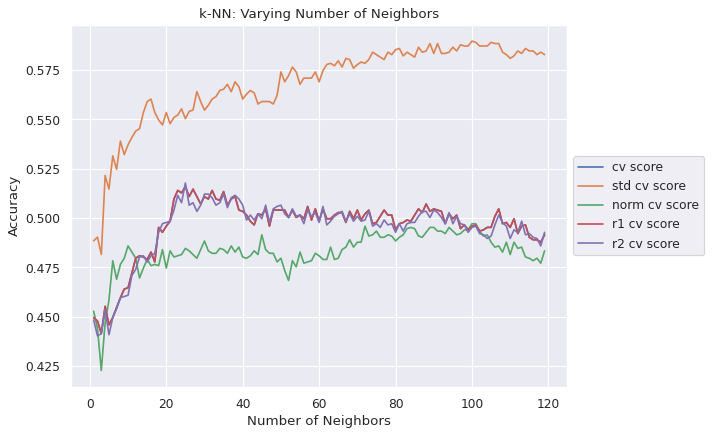

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 120
neighbors = np.arange(1, 120)
cv_scores = np.empty(len(neighbors))
cv_scores_std = np.empty(len(neighbors))
cv_scores_norm = np.empty(len(neighbors))
cv_scores_r1 = np.empty(len(neighbors))
cv_scores_r2 = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    #knn.fit(X_train, y_train)
    cvscores_10 = cross_val_score( knn, X, y, cv=10)
    # cv score for data

    cvscores_10_std = cross_val_score( knn, X_std, y, cv=10)
    # cv score for standardised scaled data

    cvscores_10_norm = cross_val_score( knn, X_norm, y, cv=10)
    # cv score for normalized data

    cvscores_10_r1 = cross_val_score( knn, X_r1, y, cv=10)
    # cv score for reduced1 data

    cvscores_10_r2 = cross_val_score( knn, X_r2, y, cv=10)
    # cv score for reduced2 data

    #print(np.mean(cvscores_20))
    cv_scores[i] = np.mean(cvscores_10) 
    cv_scores_std[i] = np.mean(cvscores_10_std)
    cv_scores_norm[i] = np.mean(cvscores_10_norm)
    cv_scores_r1[i] = np.mean(cvscores_10_r1)
    cv_scores_r2[i] = np.mean(cvscores_10_r2)

# plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(leaf_count, scores_test, '+')
# plt.plot(leaf_count, scores_test, '--', label = 'norm test score')
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, cv_scores, label = 'cv score')
plt.plot(neighbors, cv_scores_std, label = 'std cv score')
plt.plot(neighbors, cv_scores_norm, label = 'norm cv score')
plt.plot(neighbors, cv_scores_r1, label = 'r1 cv score')
plt.plot(neighbors, cv_scores_r2, label = 'r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

this model is no good. best model with 60% accuracy is not good. we still have the reduced data to try.



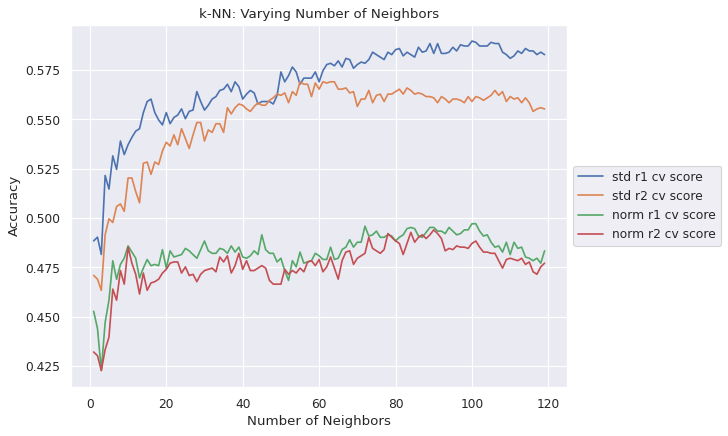

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 120
neighbors = np.arange(1, 120)
# cv_scores = np.empty(len(neighbors))
cv_scores_r1_std = np.empty(len(neighbors))
cv_scores_r2_std = np.empty(len(neighbors))
cv_scores_r1_norm = np.empty(len(neighbors))
cv_scores_r2_norm = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    #knn.fit(X_train, y_train)
    # cvscores_10 = cross_val_score( knn, X, y, cv=10)
    # cv score for data

    cv_r1_std = cross_val_score( knn, X_std_r1, y, cv=10)
    # cv score for standardised scaled data

    cv_r2_std = cross_val_score( knn, X_std_r2, y, cv=10)
    # cv score for normalized data

    cv_r1_norm = cross_val_score( knn, X_norm_r1, y, cv=10)
    # cv score for reduced1 data

    cv_r2_norm = cross_val_score( knn, X_norm_r2, y, cv=10)
    # cv score for reduced2 data

    #print(np.mean(cvscores_20))
    # cv_scores[i] = np.mean(cvscores_10) 
    cv_scores_r1_std[i] = np.mean(cv_r1_std)
    cv_scores_r2_std[i] = np.mean(cv_r2_std)
    cv_scores_r1_norm[i] = np.mean(cv_r1_norm)
    cv_scores_r2_norm[i] = np.mean(cv_r2_norm)


# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')
# plt.plot(neighbors, cv_scores, label = 'cv score')
plt.plot(neighbors, cv_scores_r1_std, label = 'std r1 cv score')
plt.plot(neighbors, cv_scores_r2_std, label = 'std r2 cv score')
plt.plot(neighbors, cv_scores_r1_norm, label = 'norm r1 cv score')
plt.plot(neighbors, cv_scores_r2_norm, label = 'norm r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid( visible = True, axis = 'both')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Here we do not see a promising model.

now, Let's try other settings of this classfier.
when we set weights as distance, they are same for every data point anymore. as per sklearn docs, weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

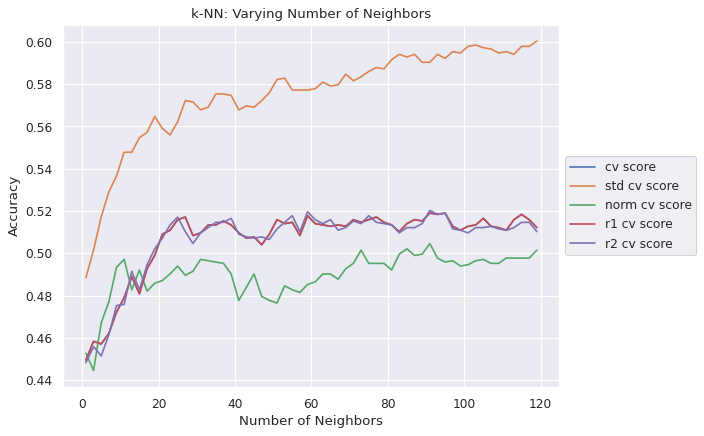

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 120
neighbors = np.arange(1, 120,2)
cv_scores = np.empty(len(neighbors))
cv_scores_std = np.empty(len(neighbors))
cv_scores_norm = np.empty(len(neighbors))
cv_scores_r1 = np.empty(len(neighbors))
cv_scores_r2 = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k,
                               weights = 'distance')

    # Fit the classifier to the training data
    #knn.fit(X_train, y_train)
    cvscores_10 = cross_val_score( knn, X, y, cv=10)
    # cv score for data

    cvscores_10_std = cross_val_score( knn, X_std, y, cv=10)
    # cv score for standardised scaled data

    cvscores_10_norm = cross_val_score( knn, X_norm, y, cv=10)
    # cv score for normalized data

    cvscores_10_r1 = cross_val_score( knn, X_r1, y, cv=10)
    # cv score for reduced1 data

    cvscores_10_r2 = cross_val_score( knn, X_r2, y, cv=10)
    # cv score for reduced2 data
    
    cv_scores[i] = np.mean(cvscores_10) 
    cv_scores_std[i] = np.mean(cvscores_10_std)
    cv_scores_norm[i] = np.mean(cvscores_10_norm)
    cv_scores_r1[i] = np.mean(cvscores_10_r1)
    cv_scores_r2[i] = np.mean(cvscores_10_r2)


# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, cv_scores, label = 'cv score')
plt.plot(neighbors, cv_scores_std, label = 'std cv score')
plt.plot(neighbors, cv_scores_norm, label = 'norm cv score')
plt.plot(neighbors, cv_scores_r1, label = 'r1 cv score')
plt.plot(neighbors, cv_scores_r2, label = 'r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

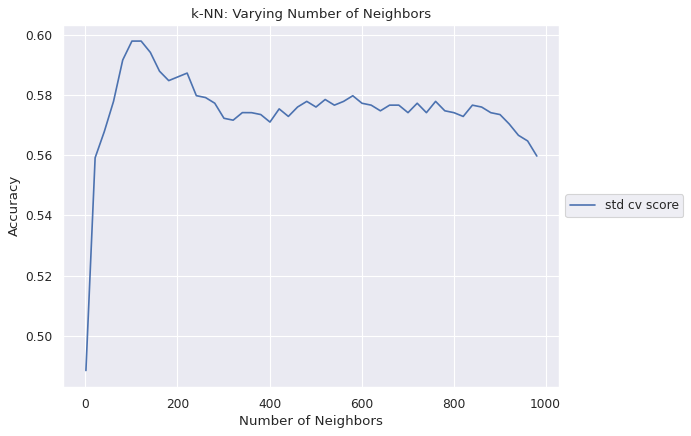

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 3000
neighbors = np.arange(1, 1000, 20)
cv_scores = np.empty(len(neighbors))
cv_scores_std = np.empty(len(neighbors))
cv_scores_norm = np.empty(len(neighbors))
cv_scores_r1 = np.empty(len(neighbors))
cv_scores_r2 = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k,
                               weights = 'distance')

    # Fit the classifier to the training data


    cvscores_10_std = cross_val_score( knn, X_std, y, cv=10)
    # cv score for reduced1 data
    cv_scores_std[i] = np.mean(cvscores_10_std)



# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')

plt.plot(neighbors, cv_scores_std, label = 'std cv score')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Now let's try this model on our adjusted reduced data. 

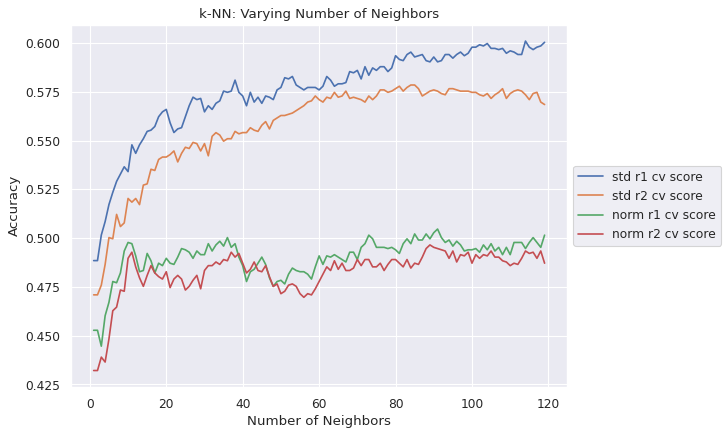

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 120
neighbors = np.arange(1, 120)
# cv_scores = np.empty(len(neighbors))
cv_scores_r1_std = np.empty(len(neighbors))
cv_scores_r2_std = np.empty(len(neighbors))
cv_scores_r1_norm = np.empty(len(neighbors))
cv_scores_r2_norm = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k,
                               weights = 'distance')

    # Fit the classifier to the training data
    #knn.fit(X_train, y_train)
    # cvscores_10 = cross_val_score( knn, X, y, cv=10)
    # cv score for data

    cv_r1_std = cross_val_score( knn, X_std_r1, y, cv=10)
    # cv score for standardised scaled data

    cv_r2_std = cross_val_score( knn, X_std_r2, y, cv=10)
    # cv score for normalized data

    cv_r1_norm = cross_val_score( knn, X_norm_r1, y, cv=10)
    # cv score for reduced1 data

    cv_r2_norm = cross_val_score( knn, X_norm_r2, y, cv=10)
    # cv score for reduced2 data

    #print(np.mean(cvscores_20))
    # cv_scores[i] = np.mean(cvscores_10) 
    cv_scores_r1_std[i] = np.mean(cv_r1_std)
    cv_scores_r2_std[i] = np.mean(cv_r2_std)
    cv_scores_r1_norm[i] = np.mean(cv_r1_norm)
    cv_scores_r2_norm[i] = np.mean(cv_r2_norm)


# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')
# plt.plot(neighbors, cv_scores, label = 'cv score')
plt.plot(neighbors, cv_scores_r1_std, label = 'std r1 cv score')
plt.plot(neighbors, cv_scores_r2_std, label = 'std r2 cv score')
plt.plot(neighbors, cv_scores_r1_norm, label = 'norm r1 cv score')
plt.plot(neighbors, cv_scores_r2_norm, label = 'norm r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

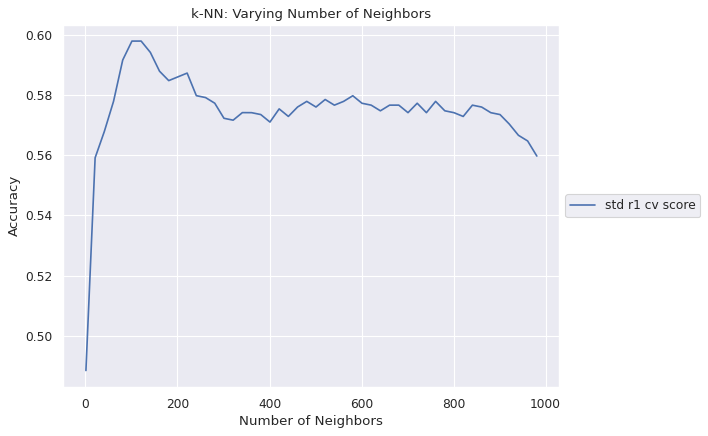

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for k in 1 to 3000
neighbors = np.arange(1, 1000, 20)
cv_scores = np.empty(len(neighbors))
cv_scores_std = np.empty(len(neighbors))
cv_scores_norm = np.empty(len(neighbors))
cv_scores_r1 = np.empty(len(neighbors))
cv_scores_r2 = np.empty(len(neighbors))
cv_scores_r1_std = np.empty(len(neighbors))
cv_scores_r2_std = np.empty(len(neighbors))
cv_scores_r1_norm = np.empty(len(neighbors))
cv_scores_r2_norm = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k,
                               weights = 'distance')

    # Fit the classifier to the training data


    cv_r1_std = cross_val_score( knn, X_std_r1, y, cv=10)
    # cv score for reduced1 data
    cv_scores_r1_std[i] = np.mean(cv_r1_std)



# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('k-NN: Varying Number of Neighbors')

plt.plot(neighbors, cv_scores_r1_std, label = 'std r1 cv score')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

we did not get good model on using KN classifier.


Let's try other classifiers

Let's try the SVC algorithm, Support Vector Classifier, which is part of svm in sklearn.

### Support Vector Classifier
 here the classifier will use hyper planes in n -dimensions to classify data points.
 To understand support vector machines, we must understand hyperplanes. Formally,
a hyperplane is an n – 1 subspace in an n-dimensional space. While that sounds complex,
it actually is pretty simple. For example, if we wanted to divide a twodimensional
space, we’d use a one-dimensional hyperplane (i.e., a line). If we wanted
to divide a three-dimensional space, we’d use a two-dimensional hyperplane (i.e., a
flat piece of paper or a bed sheet). A hyperplane is simply a generalization of that concept
into n dimensions.
Support vector machines classify data by finding the hyperplane that maximizes the
margin between the classes in the training data. In a two-dimensional example with
two classes, we can think of a hyperplane as the widest straight “band” (i.e., line with
margins) that separates the two classes.

In [ ]:
from sklearn.svm import SVC

In [ ]:

svm = SVC(kernel='rbf', random_state=42, gamma='auto')
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
# svm.fit(X_train_std, y_train)

cvscores_10 = cross_val_score( svm, X, y, cv=10)
    # cv score for data
cvscores_10_r1 = cross_val_score( svm, X_r1, y, cv=10)
    # cv score for reduced1 data
cvscores_10_r2 = cross_val_score( svm, X_r2, y, cv=10)
    # cv score for reduced2 data

cvscores_10_std = cross_val_score( svm, X_std, y, cv=10)
    # cv score for standardised scaled data
cvscores_10_std_r1 = cross_val_score( svm, X_std_r1, y, cv=10)
    # cv score for standardised scaled data
cvscores_10_std_r2 = cross_val_score( svm, X_std_r2, y, cv=10)
    # cv score for standardised scaled data

cvscores_10_norm = cross_val_score( svm, X_norm, y, cv=10)
    # cv score for normalized data
cvscores_10_norm_r1 = cross_val_score( svm, X_norm_r1, y, cv=10)
    # cv score for normalized data
cvscores_10_norm_r2 = cross_val_score( svm, X_norm_r2, y, cv=10)
    # cv score for normalized data


print("cv score: ",np.mean(cvscores_10)) 
print("cv score_r1: ",np.mean(cvscores_10_r1))
print("cv score_r2: ",np.mean(cvscores_10_r2))
print("cv score_std: ",np.mean(cvscores_10_std))
print("cv score_std r1: ",np.mean(cvscores_10_std_r1))
print("cv score_std r2: ",np.mean(cvscores_10_std_r2))
print("cv score_norm: ",np.mean(cvscores_10_norm))
print("cv score_norm r1: ",np.mean(cvscores_10_norm_r1))
print("cv score_norm r2: ",np.mean(cvscores_10_norm_r2))

cv score:  0.500314465408805
cv score_r1:  0.500314465408805
cv score_r2:  0.4915212264150943
cv score_std:  0.592248427672956
cv score_std r1:  0.592248427672956
cv score_std r2:  0.5653498427672956
cv score_norm:  0.49715015723270445
cv score_norm r1:  0.49715015723270445
cv score_norm r2:  0.4940330188679245


try other settings. 

we need to adjust the Regularisation parameter 'C', and other arguements in function to get results.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
C_value = np.array([5,10,50,100,250,500,1000])

cv_scores = np.empty(7)
cv_scores_r1 = np.empty(7)
cv_scores_r2 = np.empty(7)
cv_scores_std = np.empty(7)
cv_scores_std_r1 = np.empty(7)
cv_scores_std_r2 = np.empty(7)
cv_scores_norm = np.empty(7)
cv_scores_norm_r1 = np.empty(7)
cv_scores_norm_r2 = np.empty(7)

# Loop over different values of k
for i, k in enumerate(C_value):
    svm = SVC(kernel='rbf', random_state=42, gamma='auto', C =k)

    # Fit the classifier to the training data
    cvscores_10 = cross_val_score( svm, X, y, cv=10)
    # cv score for data
    cvscores_10_r1 = cross_val_score( svm, X_r1, y, cv=10)
    # cv score for reduced1 data
    cvscores_10_r2 = cross_val_score( svm, X_r2, y, cv=10)
    # cv score for reduced2 data

    cvscores_10_std = cross_val_score( svm, X_std, y, cv=10)
    # cv score for standardised scaled data
    cvscores_10_std_r1 = cross_val_score( svm, X_std_r1, y, cv=10)
    # cv score for standardised scaled data
    cvscores_10_std_r2 = cross_val_score( svm, X_std_r2, y, cv=10)
    # cv score for standardised scaled data

    cvscores_10_norm = cross_val_score( svm, X_norm, y, cv=10)
    # cv score for normalized data
    cvscores_10_norm_r1 = cross_val_score( svm, X_norm_r1, y, cv=10)
    # cv score for normalized data
    cvscores_10_norm_r2 = cross_val_score( svm, X_norm_r2, y, cv=10)
    # cv score for normalized data


    cv_scores[i] = np.mean(cvscores_10)
    cv_scores_r1[i] = np.mean(cvscores_10_r1)
    cv_scores_r2[i] = np.mean(cvscores_10_r2) 
    cv_scores_std[i] = np.mean(cvscores_10_std)
    cv_scores_std_r1[i] = np.mean(cvscores_10_std_r1)
    cv_scores_std_r2[i] = np.mean(cvscores_10_std_r2)
    cv_scores_norm[i] = np.mean(cvscores_10_norm)
    cv_scores_norm_r1[i] = np.mean(cvscores_10_norm_r1)
    cv_scores_norm_r2[i] = np.mean(cvscores_10_norm_r2)
    

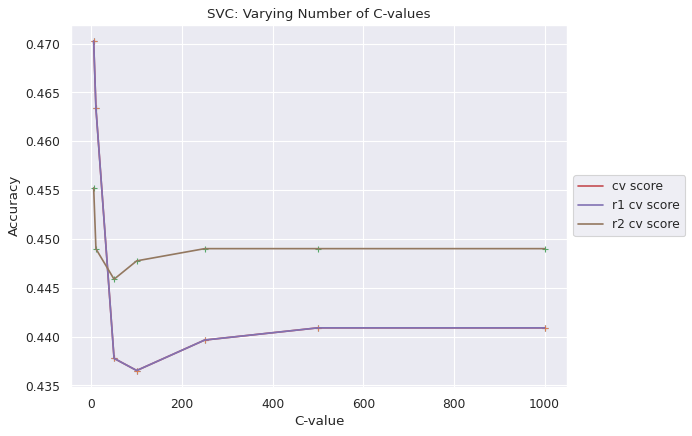

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
plt.plot(C_value, cv_scores, '+')
plt.plot(C_value, cv_scores_r1, '+')
plt.plot(C_value, cv_scores_r2, '+')
plt.plot(C_value, cv_scores, label = 'cv score')
plt.plot(C_value, cv_scores_r1, label = 'r1 cv score')
plt.plot(C_value, cv_scores_r2, label = 'r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

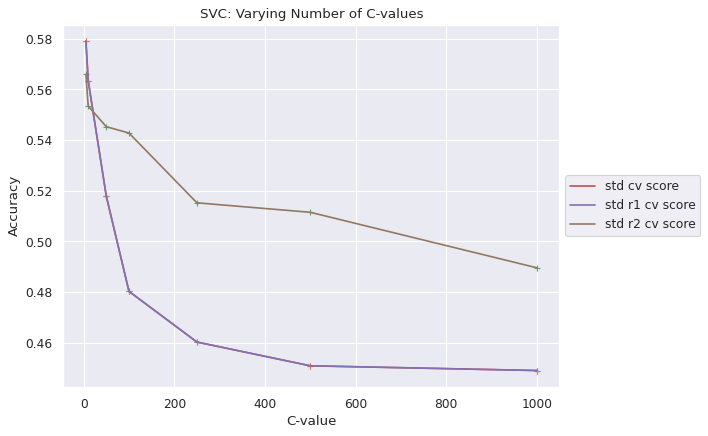

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
plt.plot(C_value, cv_scores_std, '+')
plt.plot(C_value, cv_scores_std_r1, '+')
plt.plot(C_value, cv_scores_std_r2, '+')
plt.plot(C_value, cv_scores_std, label = 'std cv score')
plt.plot(C_value, cv_scores_std_r1, label = 'std r1 cv score')
plt.plot(C_value, cv_scores_std_r2, label = 'std r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

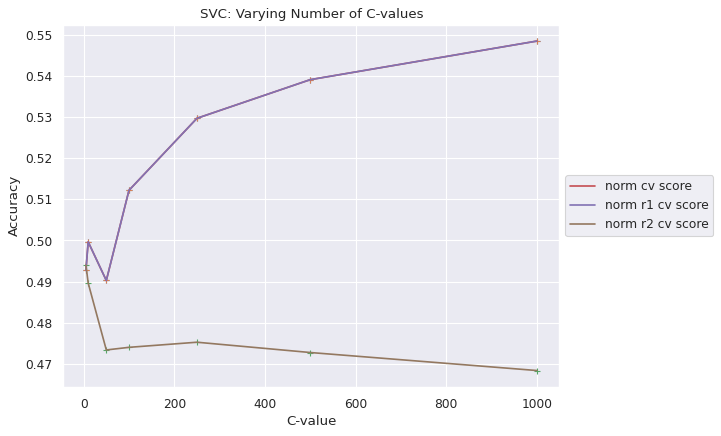

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
plt.plot(C_value, cv_scores_norm, '+')
plt.plot(C_value, cv_scores_norm_r1, '+')
plt.plot(C_value, cv_scores_norm_r2, '+')
plt.plot(C_value, cv_scores_norm, label = 'norm cv score')
plt.plot(C_value, cv_scores_norm_r1, label = 'norm r1 cv score')
plt.plot(C_value, cv_scores_norm_r2, label = 'norm r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

it seems we need to explore the models on norm data.

In [ ]:
# lets try this model for a wide range of selected  values of C 
C_value = np.array([500, 1000, 2000, 5000, 10000, 15000 ])

# cv_scores_norm = np.empty(len(C_value))
cv_scores_norm_r1 = np.empty(len(C_value))
# cv_scores_norm_r2 = np.empty(len(C_value))

# Loop over different values of k
for i, k in enumerate(C_value):
    
    svm = SVC(kernel='rbf', random_state=42, gamma='auto', C =k)

    # Fit the classifier to the training data
    # cvscores_10_norm = cross_val_score( svm, X_norm, y, cv=10)
    # cv score for normalized data
    cvscores_10_norm_r1 = cross_val_score( svm, X_norm_r1, y, cv=10)
    # cv score for normalized data
    # cvscores_10_norm_r2 = cross_val_score( svm, X_norm_r2, y, cv=10)
    # cv score for normalized data

    # cv_scores_norm[i] = np.mean(cvscores_10_norm)
    cv_scores_norm_r1[i] = np.mean(cvscores_10_norm_r1)
    # cv_scores_norm_r2[i] = np.mean(cvscores_10_norm_r2)
    

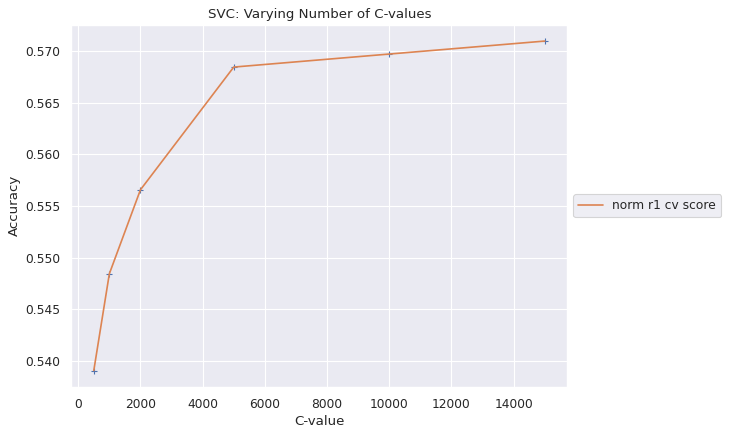

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
# plt.plot(C_value, cv_scores_norm, '+')
plt.plot(C_value, cv_scores_norm_r1, '+')
# plt.plot(C_value, cv_scores_norm_r2, '+')
# plt.plot(C_value, cv_scores_norm, label = 'norm cv score')
plt.plot(C_value, cv_scores_norm_r1, label = 'norm r1 cv score')
# plt.plot(C_value, cv_scores_norm_r2, label = 'norm r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

we see do not see an acceptable model here. let us explore the sigmoid setting.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
C_value = np.array([5,10,50,100,250,500,1000])

cv_scores = np.empty(7)
cv_scores_r1 = np.empty(7)
cv_scores_r2 = np.empty(7)
cv_scores_std = np.empty(7)
cv_scores_std_r1 = np.empty(7)
cv_scores_std_r2 = np.empty(7)
cv_scores_norm = np.empty(7)
cv_scores_norm_r1 = np.empty(7)
cv_scores_norm_r2 = np.empty(7)

# Loop over different values of k
for i, k in enumerate(C_value):

    svm = SVC(kernel='sigmoid', random_state=42, gamma='auto', C =k)

    # Fit the classifier to the training data
    cvscores_10 = cross_val_score( svm, X, y, cv=10)
    # cv score for data
    cvscores_10_r1 = cross_val_score( svm, X_r1, y, cv=10)
    # cv score for reduced1 data
    cvscores_10_r2 = cross_val_score( svm, X_r2, y, cv=10)
    # cv score for reduced2 data

    cvscores_10_std = cross_val_score( svm, X_std, y, cv=10)
    # cv score for standardised scaled data
    cvscores_10_std_r1 = cross_val_score( svm, X_std_r1, y, cv=10)
    # cv score for standardised scaled data
    cvscores_10_std_r2 = cross_val_score( svm, X_std_r2, y, cv=10)
    # cv score for standardised scaled data

    cvscores_10_norm = cross_val_score( svm, X_norm, y, cv=10)
    # cv score for normalized data
    cvscores_10_norm_r1 = cross_val_score( svm, X_norm_r1, y, cv=10)
    # cv score for normalized data
    cvscores_10_norm_r2 = cross_val_score( svm, X_norm_r2, y, cv=10)
    # cv score for normalized data


    cv_scores[i] = np.mean(cvscores_10)
    cv_scores_r1[i] = np.mean(cvscores_10_r1)
    cv_scores_r2[i] = np.mean(cvscores_10_r2) 
    cv_scores_std[i] = np.mean(cvscores_10_std)
    cv_scores_std_r1[i] = np.mean(cvscores_10_std_r1)
    cv_scores_std_r2[i] = np.mean(cvscores_10_std_r2)
    cv_scores_norm[i] = np.mean(cvscores_10_norm)
    cv_scores_norm_r1[i] = np.mean(cvscores_10_norm_r1)
    cv_scores_norm_r2[i] = np.mean(cvscores_10_norm_r2)
    

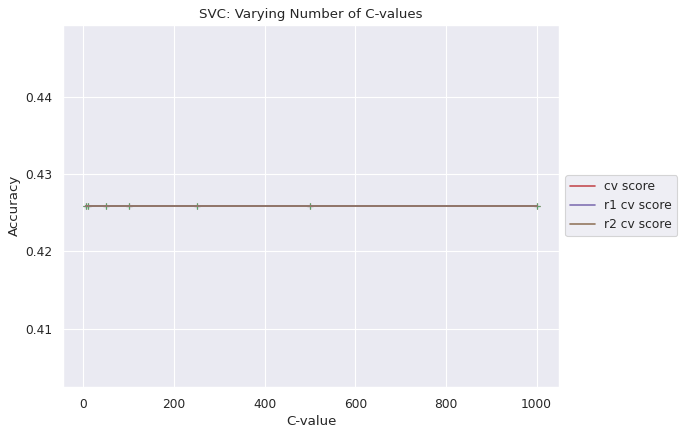

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
plt.plot(C_value, cv_scores, '+')
plt.plot(C_value, cv_scores_r1, '+')
plt.plot(C_value, cv_scores_r2, '+')
plt.plot(C_value, cv_scores, label = 'cv score')
plt.plot(C_value, cv_scores_r1, label = 'r1 cv score')
plt.plot(C_value, cv_scores_r2, label = 'r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

these models will be no good to us.

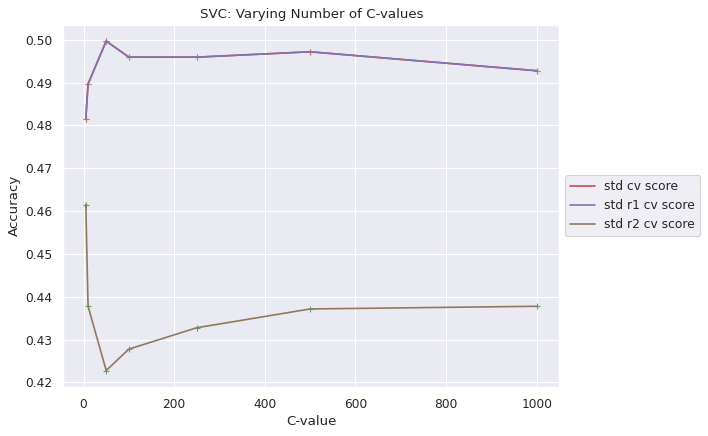

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
plt.plot(C_value, cv_scores_std, '+')
plt.plot(C_value, cv_scores_std_r1, '+')
plt.plot(C_value, cv_scores_std_r2, '+')
plt.plot(C_value, cv_scores_std, label = 'std cv score')
plt.plot(C_value, cv_scores_std_r1, label = 'std r1 cv score')
plt.plot(C_value, cv_scores_std_r2, label = 'std r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

we see std r1 data give a good model, at a small C =10.

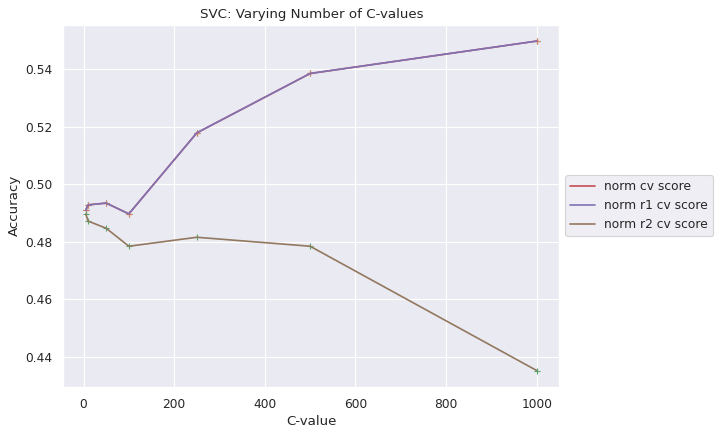

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('SVC: Varying Number of C-values')
plt.plot(C_value, cv_scores_norm, '+')
plt.plot(C_value, cv_scores_norm_r1, '+')
plt.plot(C_value, cv_scores_norm_r2, '+')
plt.plot(C_value, cv_scores_norm, label = 'norm cv score')
plt.plot(C_value, cv_scores_norm_r1, label = 'norm r1 cv score')
plt.plot(C_value, cv_scores_norm_r2, label = 'norm r2 cv score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

there are no good models here. 
explore the gamma value setting. it makes the decision regions tighter.

create train and test sets for this.

In [ ]:
from sklearn.model_selection import train_test_split
# datasets for normal data
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size = 0.1,
                                                    random_state = 42,
                                                    stratify = y)
# datasets for standard scaled data 
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split( X_std, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for normalized data 
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split( X_norm, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for reducedd1 data 
X_r1_train, X_r1_test, y_r1_train, y_r1_test = train_test_split( X_r1, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for reduced2 data 
X_r2_train, X_r2_test, y_r2_train, y_r2_test = train_test_split( X_r2, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for reduced1 std data 
X_std_r1_train, X_std_r1_test, y_std_r1_train, y_std_r1_test = train_test_split( X_std_r1, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for reduced2 std data 
X_std_r2_train, X_std_r2_test, y_std_r2_train, y_std_r2_test = train_test_split( X_std_r2, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for reduced1 norm data 
X_norm_r1_train, X_norm_r1_test, y_norm_r1_train, y_norm_r1_test = train_test_split( X_norm_r1, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

# datasets for reduced2 norm data 
X_norm_r2_train, X_norm_r2_test, y_norm_r2_train, y_norm_r2_test = train_test_split( X_norm_r2, y,
                                                                    test_size = 0.1,
                                                                    random_state = 42,
                                                                    stratify = y)

explore the gamma value setting. it makes the decision regions tighter.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
gamma_value = np.arange(0.01, 4, 0.1)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))


# Loop over different values of k
for i, k in enumerate(gamma_value):
 
    # set C as 10.0 as it gave best value
    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_train, y_train)
    
    train_acc_scores[i] = svm.score(X_train, y_train)
    test_acc_scores[i] = svm.score( X_test, y_test)

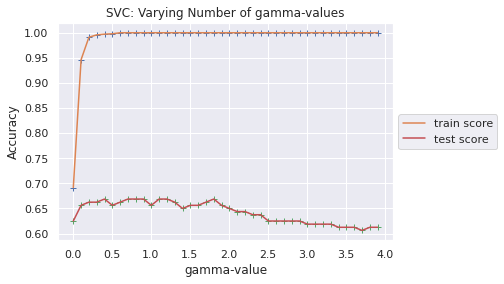

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

this model probably overfit, this model is not good.

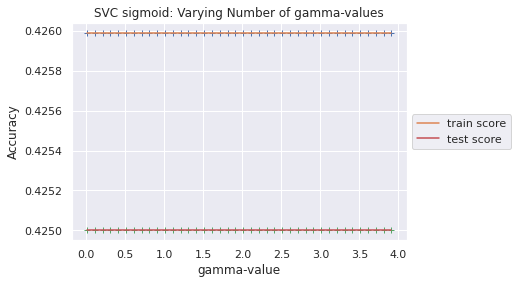

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
gamma_value = np.arange(0.01, 4, 0.1)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))


# Loop over different values of k
for i, k in enumerate(gamma_value):
 
    # set C as 10.0 as it gave best value
    svm = SVC(kernel='sigmoid', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_train, y_train)
    
    train_acc_scores[i] = svm.score(X_train, y_train)
    test_acc_scores[i] = svm.score( X_test, y_test)
# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
for i, k in enumerate(gamma_value): 
    # set C as 10.0 as it gave best value
    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_std_train, y_std_train)
    
    train_acc_scores[i] = svm.score(X_std_train, y_std_train)
    test_acc_scores[i] = svm.score( X_std_test, y_std_test)

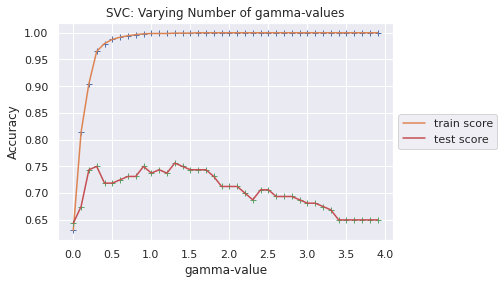

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

This model is no good, it seems that it overfit.

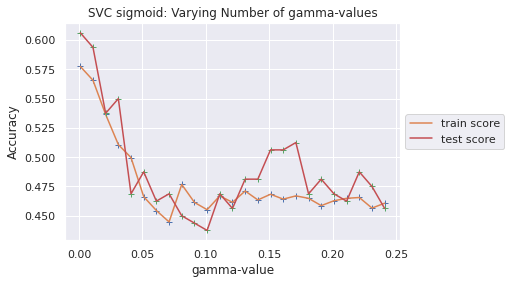

In [ ]:
gamma_value = np.arange(0.001, 0.25, 0.01)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value): 
    # set C as 10.0 as it gave best value
    svm = SVC(kernel='sigmoid', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_std_train, y_std_train)
    
    train_acc_scores[i] = svm.score(X_std_train, y_std_train)
    test_acc_scores[i] = svm.score( X_std_test, y_std_test)

# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
gamma_value = np.arange(1, 2000, 50)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value): 
    # set C as 10.0 as it gave best value
    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_norm_train, y_norm_train)
    
    train_acc_scores[i] = svm.score(X_norm_train, y_norm_train)
    test_acc_scores[i] = svm.score( X_norm_test, y_norm_test)

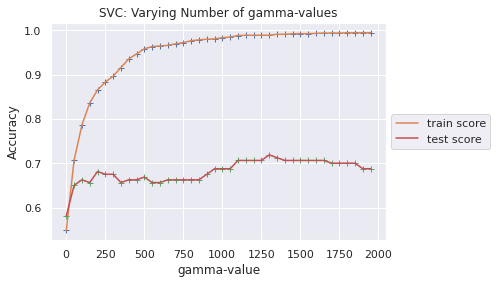

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

we do not see very good models here.

let us explore other models with more data we have.

In [ ]:
gamma_value = np.arange(0.001, 0.5, 0.01)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))


# Loop over different values of k
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    svm.fit(X_r1_train, y_r1_train)
    
    train_acc_scores[i] = svm.score(X_r1_train, y_r1_train)
    test_acc_scores[i] = svm.score( X_r1_test, y_r1_test)

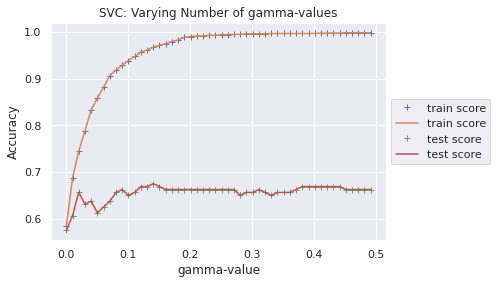

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

here we see overfitting.

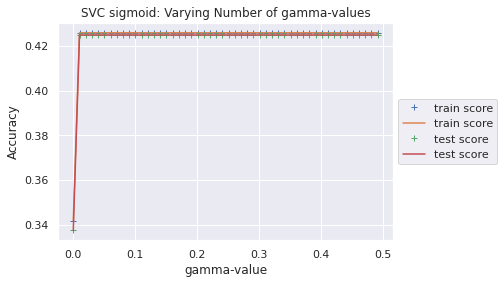

In [ ]:
gamma_value = np.arange(0.001, 0.5, 0.01)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))


# Loop over different values of k
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='sigmoid', random_state=42, gamma=k, C =10.0)

    svm.fit(X_r1_train, y_r1_train)
    
    train_acc_scores[i] = svm.score(X_r1_train, y_r1_train)
    test_acc_scores[i] = svm.score( X_r1_test, y_r1_test)
# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

# Loop over different values of k
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    svm.fit(X_r2_train, y_r2_train)
    
    train_acc_scores[i] = svm.score(X_r2_train, y_r2_train)
    test_acc_scores[i] = svm.score( X_r2_test, y_r2_test)

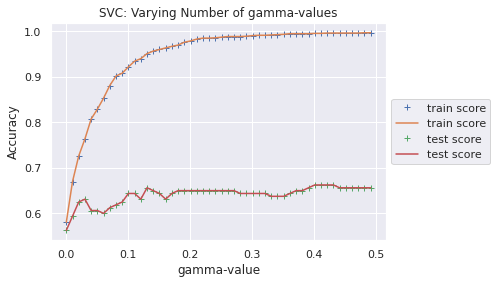

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

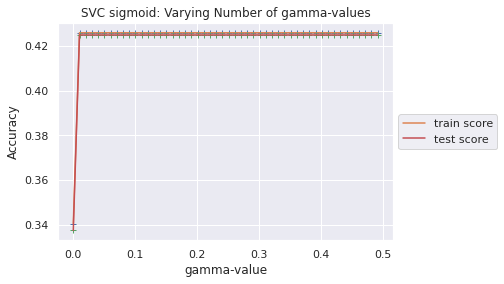

In [ ]:

# Loop over different values of k
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='sigmoid', random_state=42, gamma=k, C =10.0)

    svm.fit(X_r2_train, y_r2_train)
    
    train_acc_scores[i] = svm.score(X_r2_train, y_r2_train)
    test_acc_scores[i] = svm.score( X_r2_test, y_r2_test)
# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

let's use the std reduced data for building a model.

In [ ]:
# reduced1 std data
gamma_value = np.arange(0.001, 0.5, 0.01)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):
    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_std_r1_train, y_std_r1_train)
    
    train_acc_scores[i] = svm.score(X_std_r1_train, y_std_r1_train)
    test_acc_scores[i] = svm.score( X_std_r1_test, y_std_r1_test)

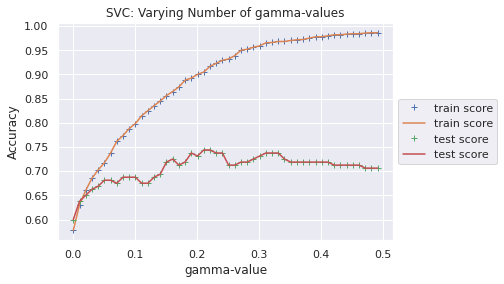

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

again we see overfitting.

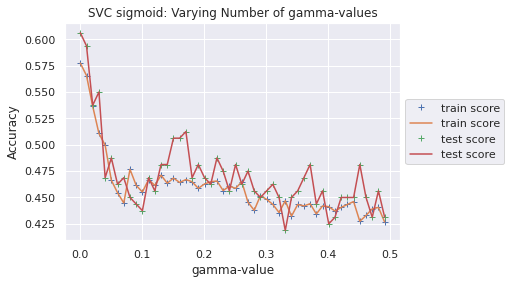

In [ ]:
# reduced1 std data
gamma_value = np.arange(0.001, 0.5, 0.01)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):
    svm = SVC(kernel='sigmoid', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_std_r1_train, y_std_r1_train)
    
    train_acc_scores[i] = svm.score(X_std_r1_train, y_std_r1_train)
    test_acc_scores[i] = svm.score( X_std_r1_test, y_std_r1_test)
# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# reduced1 std data

train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_std_r2_train, y_std_r2_train)
    
    train_acc_scores[i] = svm.score(X_std_r2_train, y_std_r2_train)
    test_acc_scores[i] = svm.score( X_std_r2_test, y_std_r2_test)

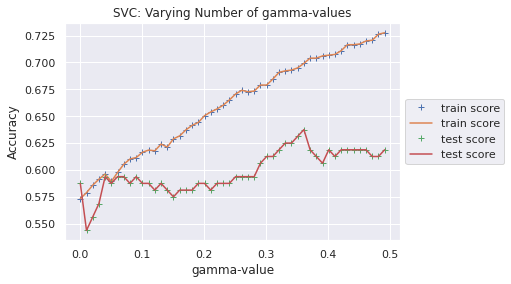

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

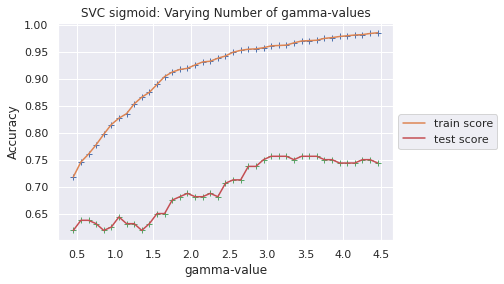

In [ ]:
# reduced1 std data
gamma_value = np.arange(0.45, 4.5, 0.1)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_std_r2_train, y_std_r2_train)
    
    train_acc_scores[i] = svm.score(X_std_r2_train, y_std_r2_train)
    test_acc_scores[i] = svm.score( X_std_r2_test, y_std_r2_test)
# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

here we manage to find a peak at gamma = ~3.4, but only at 70% accuracy.

Now let's use the normalized data.

In [ ]:
# reduced1 std data
gamma_value = np.arange(1, 2000, 200)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):
    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_norm_r1_train, y_norm_r1_train)
    
    train_acc_scores[i] = svm.score(X_norm_r1_train, y_norm_r1_train)
    test_acc_scores[i] = svm.score( X_norm_r1_test, y_norm_r1_test)

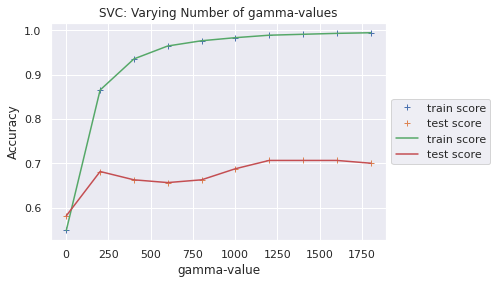

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

gamma_value = np.arange(1, 5000, 200)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='rbf', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_norm_r2_train, y_norm_r2_train)
    
    train_acc_scores[i] = svm.score(X_norm_r2_train, y_norm_r2_train)
    test_acc_scores[i] = svm.score( X_norm_r2_test, y_norm_r2_test)

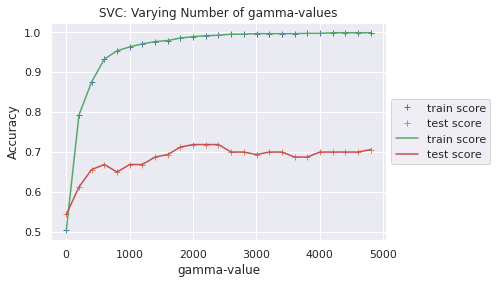

In [ ]:
# Generate plot
plt.title('SVC: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+', label = 'train score')
plt.plot(gamma_value, test_acc_scores, '+', label = 'test score')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

we see a model here with around 70% accuracy, for normalised reduced data, at gamma ~2200.0

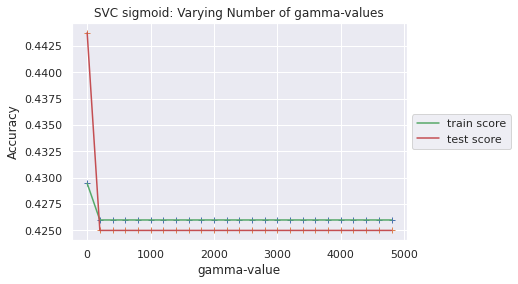

In [ ]:

gamma_value = np.arange(1, 5000, 200)
train_acc_scores = np.empty(len(gamma_value))
test_acc_scores = np.empty(len(gamma_value))
for i, k in enumerate(gamma_value):

    svm = SVC(kernel='sigmoid', random_state=42, gamma=k, C =10.0)

    # Fit the classifier to the data
    svm.fit(X_norm_r2_train, y_norm_r2_train)
    
    train_acc_scores[i] = svm.score(X_norm_r2_train, y_norm_r2_train)
    test_acc_scores[i] = svm.score( X_norm_r2_test, y_norm_r2_test)
# Generate plot
plt.title('SVC sigmoid: Varying Number of gamma-values')
plt.plot(gamma_value, train_acc_scores, '+')
plt.plot(gamma_value, test_acc_scores, '+')
plt.plot(gamma_value, train_acc_scores, label = 'train score')
plt.plot(gamma_value, test_acc_scores, label = 'test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('gamma-value')
plt.ylabel('Accuracy')
plt.show()

we found models with 70% accuracy here.

### Logistic Regression
Let's try Logistic Regression for multi-class classification

logistic regression in scikit-learn with LogisticRegression using one-vs-rest method, because it is for binary classification. logistic regressions are only binary classifiers, meaning they cannot
handle target vectors with more than two classes. However, two clever extensions to
logistic regression do just that. First, in one-vs-rest logistic regression (OVR) a separate
model is trained for each class predicted whether an observation is that class or
not (thus making it a binary classification problem). It assumes that each classification
problem (e.g., class 0 or not) is independent.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_c = LogisticRegressionCV(cv=10, random_state=42).fit( X_train, y_train)

note here that we have , class_weight='balanced'

In [ ]:
print(" training acc: ",log_c.score( X_train, y_train))
print(" test acc: ",log_c.score( X_test, y_test))

 training acc:  0.6011118832522585
 test acc:  0.61875


the scores are not looking very good. lets see if we can improve them. Let's try on scaled data.

In [ ]:
log_c = LogisticRegressionCV(cv=10, random_state=42).fit( X_std_train, y_std_train)

In [ ]:
print(" training acc: ",log_c.score( X_std_train, y_std_train))
print(" test acc: ",log_c.score( X_std_test, y_std_test))

 training acc:  0.6059763724808895
 test acc:  0.63125


Now let's try on varioius datasets types we have, for various values of C.

for normal and reduced data.

In [ ]:
from sklearn.linear_model import LogisticRegression

plot scores for various values of regularisation parameter, C.

for original and reduced data.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
c_value = np.arange(1,150,10)

scores_train = np.empty(len(c_value))
scores_test = np.empty(len(c_value))
scores_r1_train = np.empty(len(c_value))
scores_r1_test = np.empty(len(c_value))
scores_r2_train = np.empty(len(c_value))
scores_r2_test = np.empty(len(c_value))

# Loop over different values of k
for i, k in enumerate(c_value):

    log_c = LogisticRegression(C=k, random_state=42 ).fit( X_train, y_train)
    log_c1 = LogisticRegression(C=k, random_state=42 ).fit( X_r1_train, y_r1_train)
    log_c2 = LogisticRegression(C=k, random_state=42 ).fit( X_r2_train, y_r2_train)

    # Fit the classifier to the training data
    
    scores_train[i] = log_c.score( X_train, y_train)
    scores_test[i] = log_c.score( X_test, y_test)
    scores_r1_train[i] = log_c1.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = log_c1.score( X_r1_test, y_r1_test)
    scores_r2_train[i] = log_c2.score( X_r2_train, y_r2_train)
    scores_r2_test[i] = log_c2.score( X_r2_test, y_r2_test)

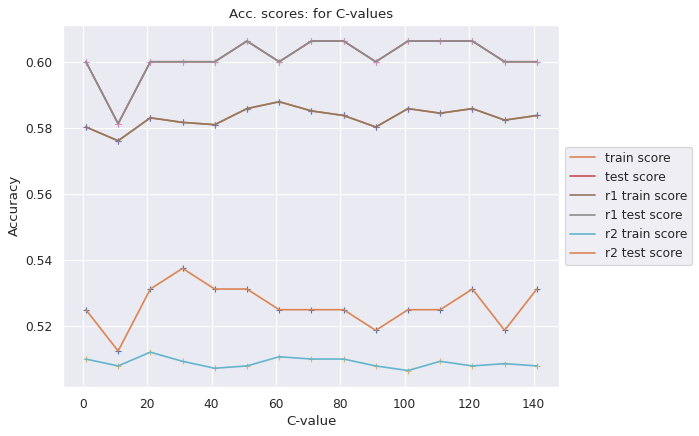

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Acc. scores: for C-values')
plt.plot(c_value, scores_train, '+')
plt.plot(c_value, scores_train, label = 'train score')
plt.plot(c_value, scores_test, '+')
plt.plot(c_value, scores_test, label = 'test score')
plt.plot(c_value, scores_r1_train, '+')
plt.plot(c_value, scores_r1_train, label = 'r1 train score')
plt.plot(c_value, scores_r1_test, '+')
plt.plot(c_value, scores_r1_test, label = 'r1 test score')
plt.plot(c_value, scores_r2_train, '+')
plt.plot(c_value, scores_r2_train, label = 'r2 train score')
plt.plot(c_value, scores_r2_test, '+')
plt.plot(c_value, scores_r2_test, label = 'r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
c_value = np.arange(1,550,10)

scores_r1_train = np.empty(len(c_value))
scores_r1_test = np.empty(len(c_value))


# Loop over different values of k
for i, k in enumerate(c_value):


    log_c1 = LogisticRegression(C=k, random_state=42 ).fit( X_r1_train, y_r1_train)


    scores_r1_train[i] = log_c1.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = log_c1.score( X_r1_test, y_r1_test)


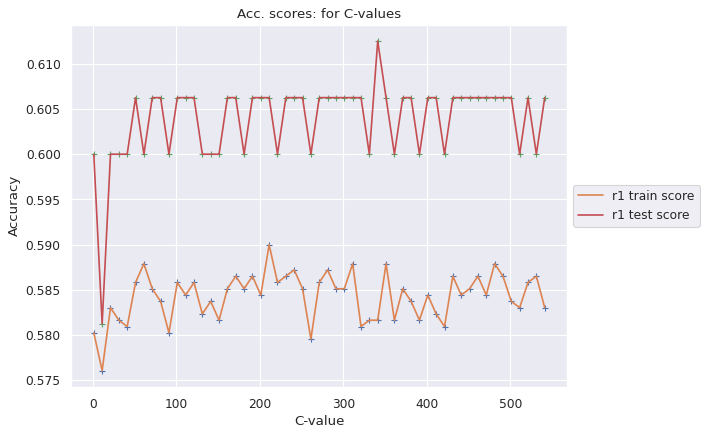

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Acc. scores: for C-values')
plt.plot(c_value, scores_r1_train, '+')
plt.plot(c_value, scores_r1_train, label = 'r1 train score')
plt.plot(c_value, scores_r1_test, '+')
plt.plot(c_value, scores_r1_test, label = 'r1 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

we only get score of 60%.

Now let's try again for standardised values.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
c_value = np.arange(1,150,10)

scores_train = np.empty(len(c_value))
scores_test = np.empty(len(c_value))
scores_r1_train = np.empty(len(c_value))
scores_r1_test = np.empty(len(c_value))
scores_r2_train = np.empty(len(c_value))
scores_r2_test = np.empty(len(c_value))

# Loop over different values of k
for i, k in enumerate(c_value):

    log_c = LogisticRegression(C=k, random_state=42).fit( X_std_train, y_std_train)
    log_c1 = LogisticRegression(C=k, random_state=42).fit( X_std_r1_train, y_std_r1_train)
    log_c2 = LogisticRegression(C=k, random_state=42).fit( X_std_r2_train, y_std_r2_train)

    # Fit the classifier to the training data
    
    scores_train[i] = log_c.score( X_std_train, y_std_train)
    scores_test[i] = log_c.score( X_std_test, y_std_test)
    scores_r1_train[i] = log_c1.score( X_std_r1_train, y_std_r1_train)
    scores_r1_test[i] = log_c1.score( X_std_r1_test, y_std_r1_test)
    scores_r2_train[i] = log_c2.score( X_std_r2_train, y_std_r2_train)
    scores_r2_test[i] = log_c2.score( X_std_r2_test, y_std_r2_test)

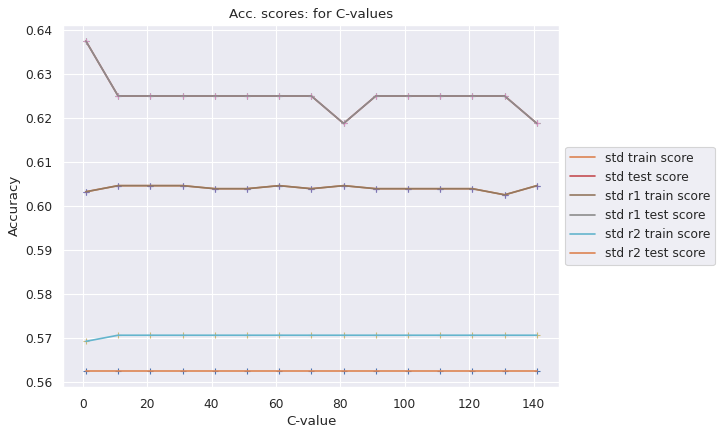

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Acc. scores: for C-values')
plt.plot(c_value, scores_train, '+')
plt.plot(c_value, scores_train, label = 'std train score')
plt.plot(c_value, scores_test, '+')
plt.plot(c_value, scores_test, label = 'std test score')
plt.plot(c_value, scores_r1_train, '+')
plt.plot(c_value, scores_r1_train, label = 'std r1 train score')
plt.plot(c_value, scores_r1_test, '+')
plt.plot(c_value, scores_r1_test, label = 'std r1 test score')
plt.plot(c_value, scores_r2_train, '+')
plt.plot(c_value, scores_r2_train, label = 'std r2 train score')
plt.plot(c_value, scores_r2_test, '+')
plt.plot(c_value, scores_r2_test, label = 'std r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

std r1 data model looks really good but we must check it thoroughly later on.

Now try on normalized data.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
c_value = np.arange(1,150,10)

scores_train = np.empty(len(c_value))
scores_test = np.empty(len(c_value))
scores_r1_train = np.empty(len(c_value))
scores_r1_test = np.empty(len(c_value))
scores_r2_train = np.empty(len(c_value))
scores_r2_test = np.empty(len(c_value))

# Loop over different values of k
for i, k in enumerate(c_value):

    log_c = LogisticRegression(C=k, random_state=42).fit( X_norm_train, y_norm_train)
    log_c1 = LogisticRegression(C=k, random_state=42).fit( X_norm_r1_train, y_norm_r1_train)
    log_c2 = LogisticRegression(C=k, random_state=42).fit( X_norm_r2_train, y_norm_r2_train)
    
    scores_train[i] = log_c.score( X_norm_train, y_norm_train)
    scores_test[i] = log_c.score( X_norm_test, y_norm_test)
    scores_r1_train[i] = log_c1.score( X_norm_r1_train, y_norm_r1_train)
    scores_r1_test[i] = log_c1.score( X_norm_r1_test, y_norm_r1_test)
    scores_r2_train[i] = log_c2.score( X_norm_r2_train, y_norm_r2_train)
    scores_r2_test[i] = log_c2.score( X_norm_r2_test, y_norm_r2_test)

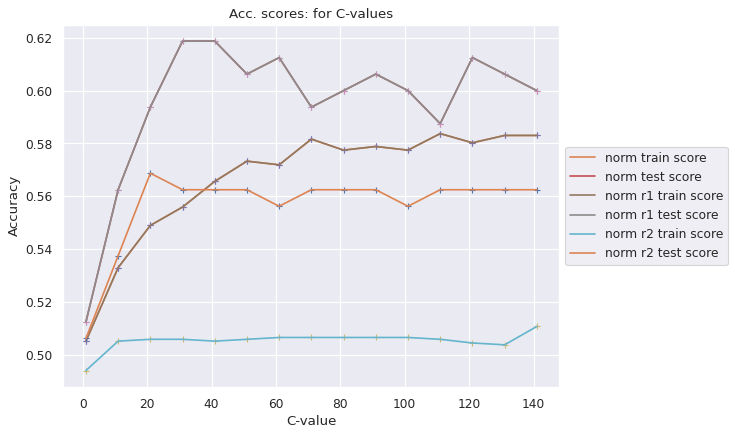

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Acc. scores: for C-values')
plt.plot(c_value, scores_train, '+')
plt.plot(c_value, scores_train, label = 'norm train score')
plt.plot(c_value, scores_test, '+')
plt.plot(c_value, scores_test, label = 'norm test score')
plt.plot(c_value, scores_r1_train, '+')
plt.plot(c_value, scores_r1_train, label = 'norm r1 train score')
plt.plot(c_value, scores_r1_test, '+')
plt.plot(c_value, scores_r1_test, label = 'norm r1 test score')
plt.plot(c_value, scores_r2_train, '+')
plt.plot(c_value, scores_r2_train, label = 'norm r2 train score')
plt.plot(c_value, scores_r2_test, '+')
plt.plot(c_value, scores_r2_test, label = 'norm r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

here we see that normalized r1 data is giving promising results, let's explore it for a wide range of C values.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
c_value = np.arange(90,3000,30)
scores_r1_train = np.empty(len(c_value))
scores_r1_test = np.empty(len(c_value))

# Loop over different values of k
for i, k in enumerate(c_value):

    log_c1 = LogisticRegression(C=k, random_state=42).fit( X_norm_r1_train, y_norm_r1_train)

    scores_r1_train[i] = log_c1.score( X_norm_r1_train, y_norm_r1_train)
    scores_r1_test[i] = log_c1.score( X_norm_r1_test, y_norm_r1_test)

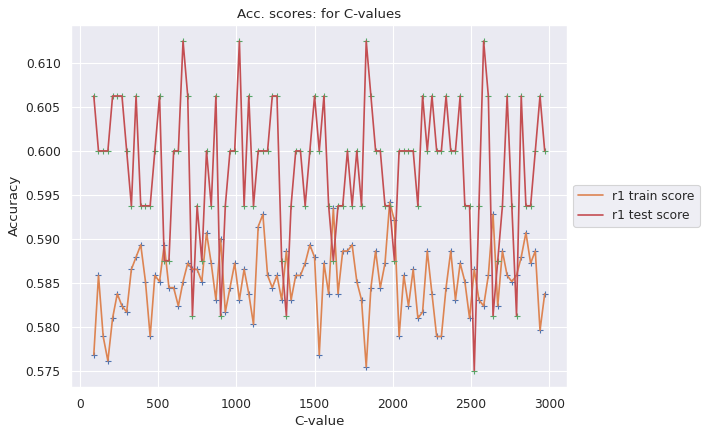

In [ ]:
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Acc. scores: for C-values')
plt.plot(c_value, scores_r1_train, '+')
plt.plot(c_value, scores_r1_train, label = 'r1 train score')
plt.plot(c_value, scores_r1_test, '+')
plt.plot(c_value, scores_r1_test, label = 'r1 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
scores_r1_test.max()

0.6125

we did not get good accuracy for these values of C.

let's move on to other classifiers. now let's try

### Naive Bayes Classifier

In machine learning, one application of Bayes’ theorem to classification comes in the
form of the naive Bayes classifier. Naive Bayes classifiers combine a number of desirable
qualities in practical machine learning into a single classifier. These include:
1. An intuitative approach
2. The ability to work with small data
3. Low computation costs for training and prediction
4. Often solid results in a variety of settings.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
# import sklearn.naive_bayes as nb

let's try this data on original data.

In [ ]:
nb = MultinomialNB()
# m = nb.GaussianNB()
nb.fit(X_train, y_train)

print(" training acc: ",log_c.score( X_train, y_train))
print(" test acc: ",log_c.score( X_test, y_test))

 training acc:  0.12439193884642112
 test acc:  0.125


try model on original data and reduced data.

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
alpha_value = np.arange( 1, 2500,50)

scores_train = np.empty(len(alpha_value))
scores_test = np.empty(len(alpha_value))
scores_r1_train = np.empty(len(alpha_value))
scores_r1_test = np.empty(len(alpha_value))
scores_r2_train = np.empty(len(alpha_value))
scores_r2_test = np.empty(len(alpha_value))

# Loop over different values of k
for i, k in enumerate(alpha_value):

    nb1 = MultinomialNB(alpha =k ).fit( X_train, y_train)
    nb2 = MultinomialNB(alpha =k ).fit( X_r1_train, y_r1_train)
    nb3 = MultinomialNB(alpha =k ).fit( X_r2_train, y_r2_train)

    # Fit the classifier to the training data
    
    scores_train[i] = nb1.score( X_train, y_train)
    scores_test[i] = nb1.score( X_test, y_test)
    scores_r1_train[i] = nb2.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = nb2.score( X_r1_test, y_r1_test)
    scores_r2_train[i] = nb3.score( X_r2_train, y_r2_train)
    scores_r2_test[i] = nb3.score( X_r2_test, y_r2_test)

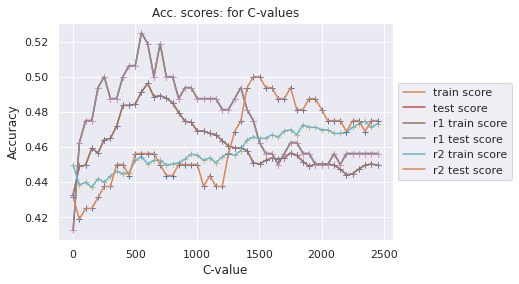

In [ ]:
# Generate plot
plt.title('Acc. scores: for C-values')
plt.plot(alpha_value, scores_train, '+')
plt.plot(alpha_value, scores_train, label = 'train score')
plt.plot(alpha_value, scores_test, '+')
plt.plot(alpha_value, scores_test, label = 'test score')
plt.plot(alpha_value, scores_r1_train, '+')
plt.plot(alpha_value, scores_r1_train, label = 'r1 train score')
plt.plot(alpha_value, scores_r1_test, '+')
plt.plot(alpha_value, scores_r1_test, label = 'r1 test score')
plt.plot(alpha_value, scores_r2_train, '+')
plt.plot(alpha_value, scores_r2_train, label = 'r2 train score')
plt.plot(alpha_value, scores_r2_test, '+')
plt.plot(alpha_value, scores_r2_test, label = 'r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

look at the peak. score of 0.52 is not good.

Let's try another setting.

In [ ]:
nb = GaussianNB()
# m = nb.GaussianNB()
nb.fit(X_train, y_train)

print(" training acc: ",log_c.score( X_train, y_train))
print(" test acc: ",log_c.score( X_test, y_test))

 training acc:  0.12439193884642112
 test acc:  0.125


check scores on original and reduced data.

In [ ]:
nb1 = GaussianNB( ).fit( X_train, y_train)
nb2 = GaussianNB( ).fit( X_r1_train, y_r1_train)
nb3 = GaussianNB( ).fit( X_r2_train, y_r2_train)

scores_train = nb1.score( X_train, y_train)
scores_test = nb1.score( X_test, y_test)
scores_r1_train = nb2.score( X_r1_train, y_r1_train)
scores_r1_test = nb2.score( X_r1_test, y_r1_test)
scores_r2_train = nb3.score( X_r2_train, y_r2_train)
scores_r2_test = nb3.score( X_r2_test, y_r2_test)

In [ ]:
print("original data score: ",scores_train)
print("original data test score: ",scores_test)
print("reduced1 data score: ",scores_r1_train)
print("reduced1 data test score: ",scores_r1_test)
print("reduced2 data score: ",scores_r2_train)
print("reduced2 data test score: ",scores_r2_test)

original data score:  0.5649756775538568
original data test score:  0.58125
reduced1 data score:  0.5649756775538568
reduced1 data test score:  0.58125
reduced2 data score:  0.56636553161918
reduced2 data test score:  0.575


reduced1 data gives good model. will test this later.

now check on standardised scaled data.

In [ ]:
nb1 = GaussianNB( ).fit( X_std_train, y_train)
nb2 = GaussianNB( ).fit( X_std_r1_train, y_r1_train)
nb3 = GaussianNB( ).fit( X_std_r2_train, y_r2_train)

scores_train = nb1.score( X_std_train, y_std_train)
scores_test = nb1.score( X_std_test, y_std_test)
scores_r1_train = nb2.score( X_std_r1_train, y_std_r1_train)
scores_r1_test = nb2.score( X_std_r1_test, y_std_r1_test)
scores_r2_train = nb3.score( X_std_r2_train, y_std_r2_train)
scores_r2_test = nb3.score( X_std_r2_test, y_std_r2_test)

print("scaled data score: ",scores_train)
print("scaled data test score: ",scores_test)
print("scaled reduced1 data score: ",scores_r1_train)
print("scaled reduced1 data test score: ",scores_r1_test)
print("scaled reduced2 data score: ",scores_r2_train)
print("scaled reduced2 data test score: ",scores_r2_test)

scaled data score:  0.5635858234885337
scaled data test score:  0.575
scaled reduced1 data score:  0.5635858234885337
scaled reduced1 data test score:  0.575
scaled reduced2 data score:  0.56636553161918
scaled reduced2 data test score:  0.575


now check on normalized data.

In [ ]:
nb1 = GaussianNB( ).fit( X_norm_train, y_norm_train)
nb2 = GaussianNB( ).fit( X_norm_r1_train, y_norm_r1_train)
nb3 = GaussianNB( ).fit( X_norm_r2_train, y_norm_r2_train)

scores_train = nb1.score( X_norm_train, y_norm_train)
scores_test = nb1.score( X_norm_test, y_norm_test)
scores_r1_train = nb2.score( X_norm_r1_train, y_norm_r1_train)
scores_r1_test = nb2.score( X_norm_r1_test, y_norm_r1_test)
scores_r2_train = nb3.score( X_norm_r2_train, y_norm_r2_train)
scores_r2_test = nb3.score( X_norm_r2_test, y_norm_r2_test)

print("normalized data score: ",scores_train)
print("normalized data test score: ",scores_test)
print("normalized reduced1 data score: ",scores_r1_train)
print("normalized reduced1 data test score: ",scores_r1_test)
print("normalized reduced2 data score: ",scores_r2_train)
print("normalized reduced2 data test score: ",scores_r2_test)

normalized data score:  0.44683808200138986
normalized data test score:  0.45625
normalized reduced1 data score:  0.44683808200138986
normalized reduced1 data test score:  0.45625
normalized reduced2 data score:  0.46907574704656013
normalized reduced2 data test score:  0.46875


these model are not doing well.

Moving on to other classification algorithms.

Let's try 
### Decision Tree Classifier.
Tree-based learning algorithms are a broad and popular family of related nonparametric,
supervised methods for both classification and regression. The basis of
tree-based learners is the decision tree wherein a series of decision rules (e.g., “If their
gender is male…”) are chained. The result looks vaguely like an upside-down tree,
with the first decision rule at the top and subsequent decision rules spreading out
below. In a decision tree, every decision rule occurs at a decision node, with the rule
creating branches leading to new nodes. A branch without a decision rule at the end
is called a leaf.
One reason for the popularity of tree-based models is their interpretability. In fact,
decision trees can literally be drawn out in their complete form to
create a highly intuitive model. From this basic tree system comes a wide variety of
extensions from random forests to stacking.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=42)

on original data

In [ ]:
decisiontree.fit( X_train, y_train)
scores_train = decisiontree.score( X_train, y_train)
scores_test = decisiontree.score( X_test, y_test)
print("original train score: ",scores_train)
print("original test score: ",scores_test)
print(" leaf count: ",decisiontree.get_n_leaves())

original train score:  1.0
original test score:  0.65625
 leaf count:  366


on original and reduced data. will check the tree for diffrent number of leaves.

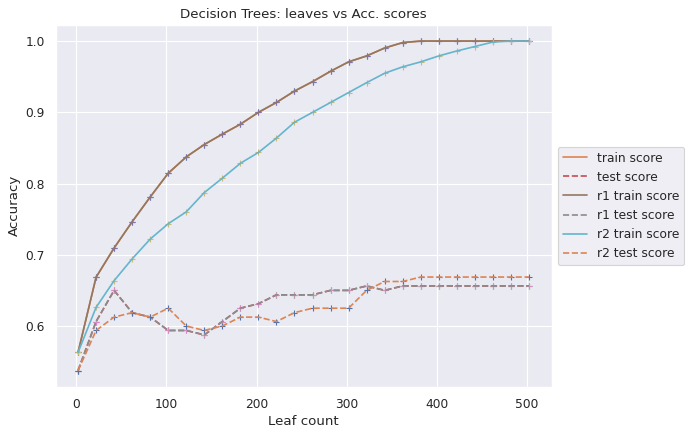

In [ ]:
# # Setup arrays to store train and test accuracies
# # lets try this model for a wide range of selected  values
leaf_count = np.arange(2,503,20)

scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_train, y_train)
    decisiontree2 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_r1_train, y_r1_train)
    decisiontree3 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_r2_train, y_r2_train)

    scores_train[i] = decisiontree1.score( X_train, y_train)
    scores_test[i] = decisiontree1.score( X_test, y_test)
    scores_r1_train[i] = decisiontree2.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_r1_test, y_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_r2_train, y_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_r2_test, y_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Decision Trees: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

the original data & reduced data lines are overlapping here.
Now, on standard scaled data.

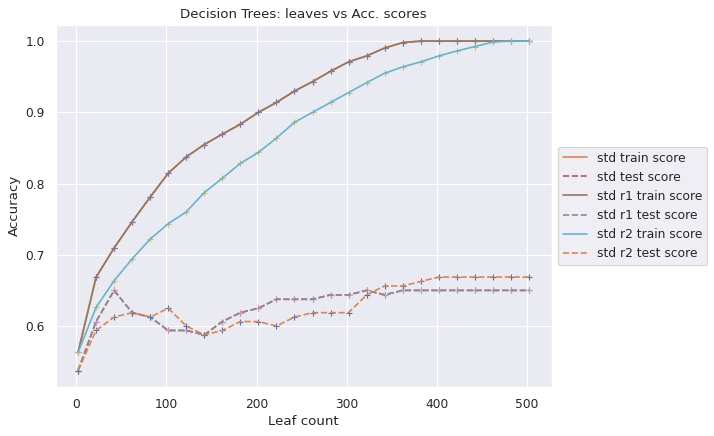

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_std_train, y_train)
    decisiontree2 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_std_r1_train, y_r1_train)
    decisiontree3 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_std_r2_train, y_r2_train)

    scores_train[i] = decisiontree1.score( X_std_train, y_std_train)
    scores_test[i] = decisiontree1.score( X_std_test, y_std_test)
    scores_r1_train[i] = decisiontree2.score( X_std_r1_train, y_std_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_std_r1_test, y_std_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_std_r2_train, y_std_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_std_r2_test, y_std_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Decision Trees: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'std train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'std test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'std r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'std r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'std r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'std r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()


now try on normalized data

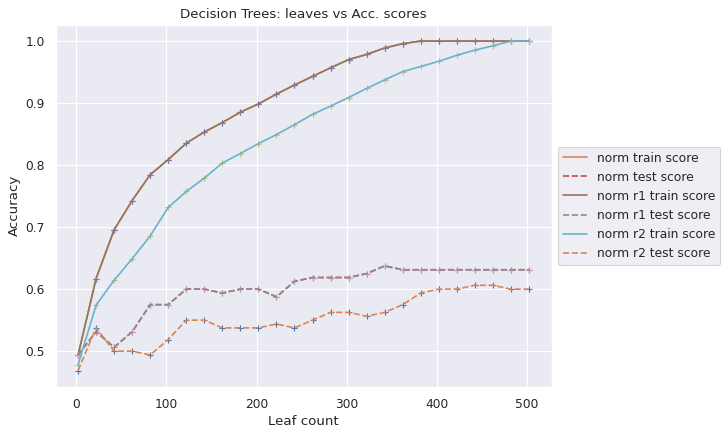

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):
    decisiontree1 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_norm_train, y_norm_train)
    decisiontree2 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_norm_r1_train, y_norm_r1_train)
    decisiontree3 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=k).fit( X_norm_r2_train, y_norm_r2_train)

    scores_train[i] = decisiontree1.score( X_norm_train, y_norm_train)
    scores_test[i] = decisiontree1.score( X_norm_test, y_norm_test)
    scores_r1_train[i] = decisiontree2.score( X_norm_r1_train, y_norm_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_norm_r1_test, y_norm_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_norm_r2_train, y_norm_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_norm_r2_test, y_norm_r2_test)
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Decision Trees: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'norm train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'norm test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'norm r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'norm r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'norm r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'norm r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()


now let us try with another setting of the algorithm.

on original, reduced data

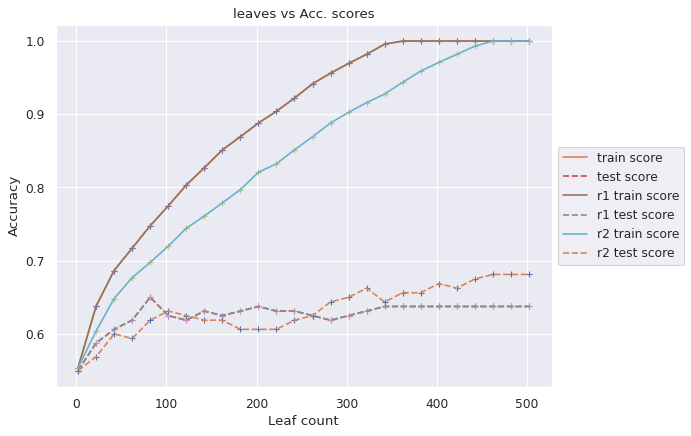

In [ ]:
leaf_count = np.arange(2,503,20)

scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_train, y_train)
    decisiontree2 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_r1_train, y_r1_train)
    decisiontree3 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_r2_train, y_r2_train)

    # Fit the classifier to the training data
    
    scores_train[i] = decisiontree1.score( X_train, y_train)
    scores_test[i] = decisiontree1.score( X_test, y_test)
    scores_r1_train[i] = decisiontree2.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_r1_test, y_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_r2_train, y_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_r2_test, y_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()



on standardised scaled data.

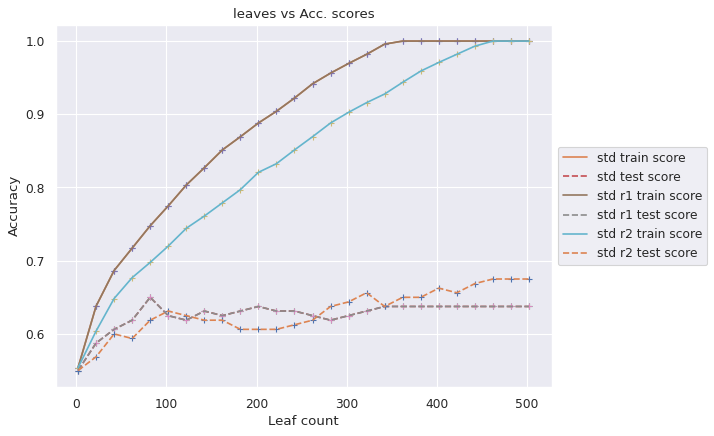

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_std_train, y_train)
    decisiontree2 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_std_r1_train, y_r1_train)
    decisiontree3 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_std_r2_train, y_r2_train)

    scores_train[i] = decisiontree1.score( X_std_train, y_std_train)
    scores_test[i] = decisiontree1.score( X_std_test, y_std_test)
    scores_r1_train[i] = decisiontree2.score( X_std_r1_train, y_std_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_std_r1_test, y_std_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_std_r2_train, y_std_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_std_r2_test, y_std_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'std train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'std test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'std r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'std r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'std r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'std r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()



on normalized data.

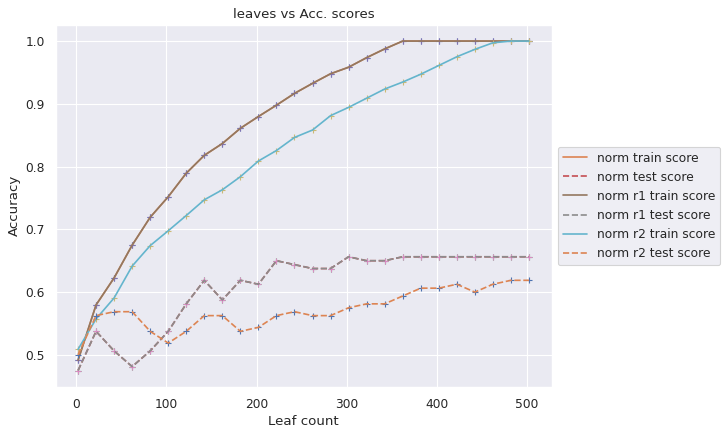

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):
    decisiontree1 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_norm_train, y_norm_train)
    decisiontree2 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_norm_r1_train, y_norm_r1_train)
    decisiontree3 = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_leaf_nodes=k).fit( X_norm_r2_train, y_norm_r2_train)

    scores_train[i] = decisiontree1.score( X_norm_train, y_norm_train)
    scores_test[i] = decisiontree1.score( X_norm_test, y_norm_test)
    scores_r1_train[i] = decisiontree2.score( X_norm_r1_train, y_norm_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_norm_r1_test, y_norm_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_norm_r2_train, y_norm_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_norm_r2_test, y_norm_r2_test)
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'norm train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'norm test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'norm r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'norm r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'norm r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'norm r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

we did not get good models for normalized data

we got some good models with this algorithm.

Let's try another classification algorithm. 
### Random Forests Classifier
When we want to train a classification model using a “forest” of randomized decision trees.

A common problem with decision trees is that they tend to fit the training data too
closely (i.e., overfitting). This has motivated the widespread use of an ensemble learning
method called random forest. In a random forest, many decision trees are trained,
but each tree only receives a bootstrapped sample of observations (i.e., a random
sample of observations with replacement that matches the original number of observations)
and each node only considers a subset of features when determining the best
split. This forest of randomized decision trees (hence the name) votes to determine
the predicted class.

RandomForestClassifier also uses many of the same parameters as DecisionTree
Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
decisiontree = RandomForestClassifier( random_state = 42)

# decisiontree = RandomForestClassifier( n_estimators = 100 , criterion = 'gini'
#                                       random_state = 42)

In [ ]:
decisiontree.fit( X_train, y_train)
scores_train = decisiontree.score( X_train, y_train)
scores_test = decisiontree.score( X_test, y_test)
print("original train score: ",scores_train)
print("original test score: ",scores_test)
# print(" leaf count: ",decisiontree.get_n_leaves())

original train score:  1.0
original test score:  0.7375


There are various settings to explore in this algorithm. here we will experiment with the number of estimators and criterion.

first on 'gini', which is by default.

On original and reduced data.

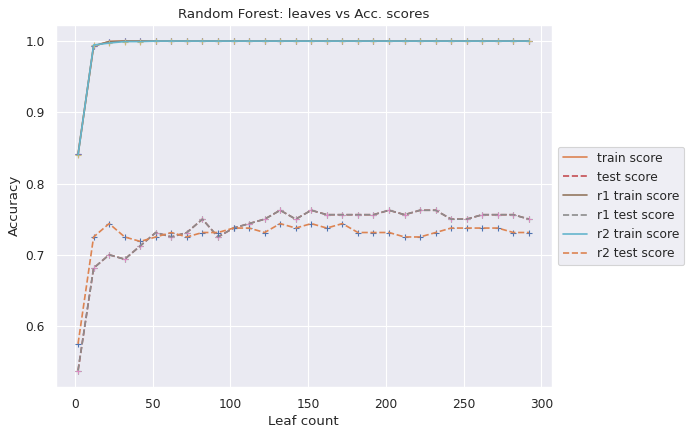

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
leaf_count = np.arange(2,302,10)

scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_train, y_train)
    decisiontree2 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_r1_train, y_r1_train)
    decisiontree3 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_r2_train, y_r2_train)

    # Fit the classifier to the training data
    
    scores_train[i] = decisiontree1.score( X_train, y_train)
    scores_test[i] = decisiontree1.score( X_test, y_test)
    scores_r1_train[i] = decisiontree2.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_r1_test, y_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_r2_train, y_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_r2_test, y_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Random Forest: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

all data gives a model with 70% accuracy. for estimators more than 80 for r1, and more than 40 for r2. we will choose it for testing later.

on standard scaled data.

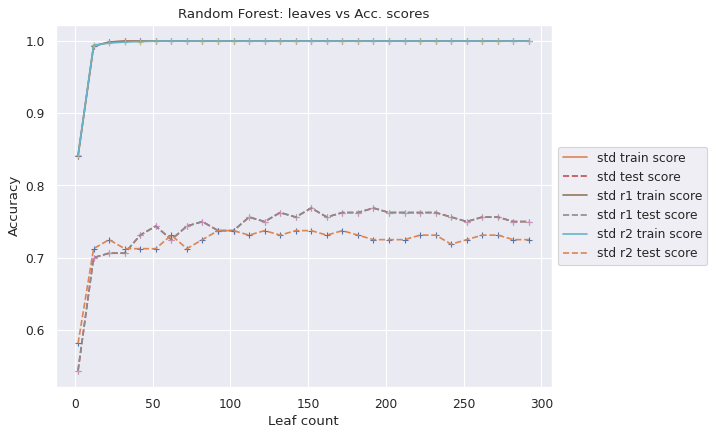

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_std_train, y_train)
    decisiontree2 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_std_r1_train, y_r1_train)
    decisiontree3 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_std_r2_train, y_r2_train)

    scores_train[i] = decisiontree1.score( X_std_train, y_std_train)
    scores_test[i] = decisiontree1.score( X_std_test, y_std_test)
    scores_r1_train[i] = decisiontree2.score( X_std_r1_train, y_std_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_std_r1_test, y_std_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_std_r2_train, y_std_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_std_r2_test, y_std_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Random Forest: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'std train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'std test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'std r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'std r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'std r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'std r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

we see a promising model here, built on scaled r1 data.

on normalized data.

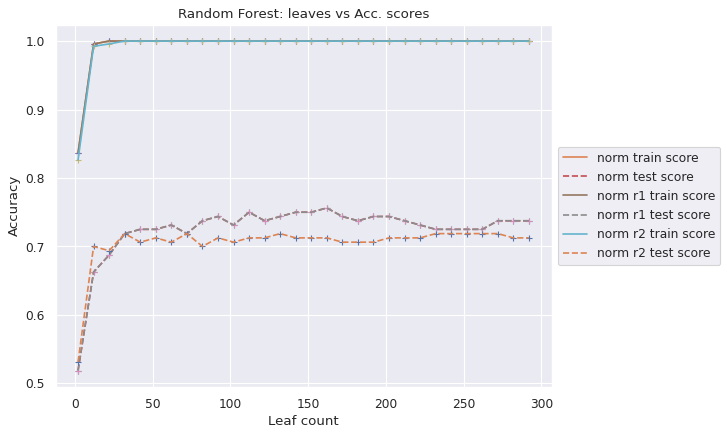

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):
    decisiontree1 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_norm_train, y_norm_train)
    decisiontree2 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_norm_r1_train, y_norm_r1_train)
    decisiontree3 = RandomForestClassifier(random_state=42, n_estimators=k).fit( X_norm_r2_train, y_norm_r2_train)

    scores_train[i] = decisiontree1.score( X_norm_train, y_norm_train)
    scores_test[i] = decisiontree1.score( X_norm_test, y_norm_test)
    scores_r1_train[i] = decisiontree2.score( X_norm_r1_train, y_norm_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_norm_r1_test, y_norm_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_norm_r2_train, y_norm_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_norm_r2_test, y_norm_r2_test)
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Random Forest: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'norm train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'norm test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'norm r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'norm r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'norm r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'norm r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

all model are ok. their test scores are above 70%.

this algorithm offers various settings. let's set one such setting for our model. 

set criterion to 'entropy'

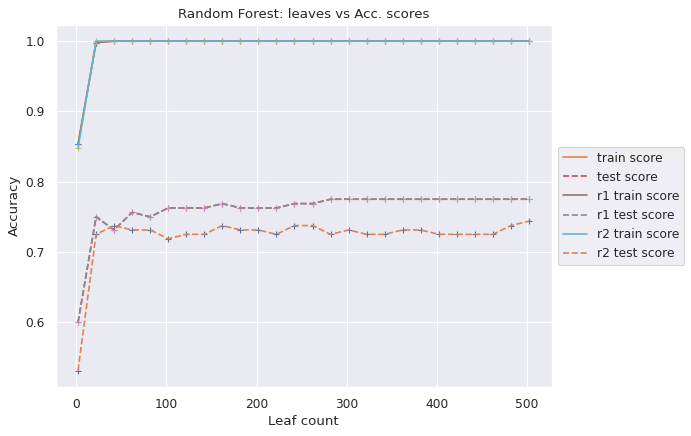

In [ ]:
# Setup arrays to store train and test accuracies
# lets try this model for a wide range of selected  values of C 
leaf_count = np.arange(2,503,20)

scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_estimators=k).fit( X_train, y_train)
    decisiontree2 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_estimators=k).fit( X_r1_train, y_r1_train)
    decisiontree3 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_estimators=k).fit( X_r2_train, y_r2_train)

    # Fit the classifier to the training data
    
    scores_train[i] = decisiontree1.score( X_train, y_train)
    scores_test[i] = decisiontree1.score( X_test, y_test)
    scores_r1_train[i] = decisiontree2.score( X_r1_train, y_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_r1_test, y_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_r2_train, y_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_r2_test, y_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Random Forest: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

a good model here.
on standardised data.

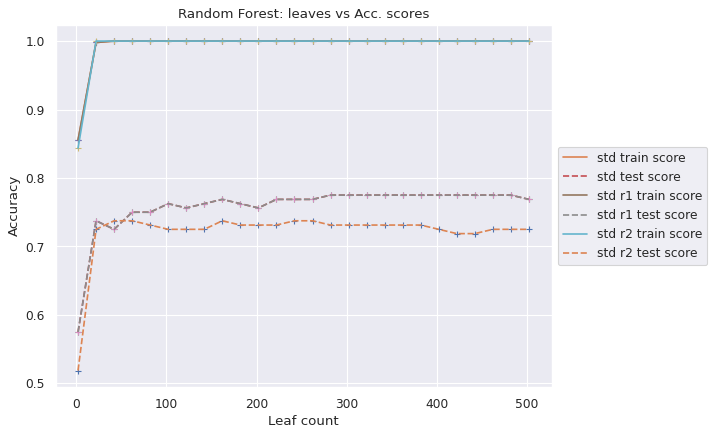

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):

    decisiontree1 = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=k).fit( X_std_train, y_train)
    decisiontree2 = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=k).fit( X_std_r1_train, y_r1_train)
    decisiontree3 = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=k).fit( X_std_r2_train, y_r2_train)

    scores_train[i] = decisiontree1.score( X_std_train, y_std_train)
    scores_test[i] = decisiontree1.score( X_std_test, y_std_test)
    scores_r1_train[i] = decisiontree2.score( X_std_r1_train, y_std_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_std_r1_test, y_std_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_std_r2_train, y_std_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_std_r2_test, y_std_r2_test)

# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Random Forest: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'std train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'std test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'std r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'std r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'std r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'std r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

 a very promising model here.
 now on norm data.

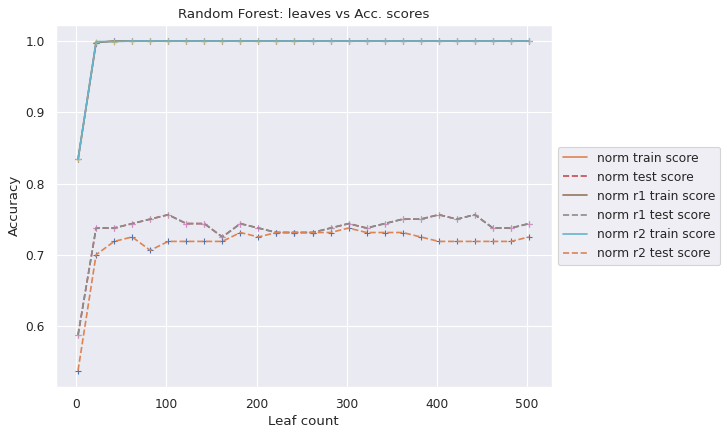

In [ ]:
scores_train = np.empty(len(leaf_count))
scores_test = np.empty(len(leaf_count))
scores_r1_train = np.empty(len(leaf_count))
scores_r1_test = np.empty(len(leaf_count))
scores_r2_train = np.empty(len(leaf_count))
scores_r2_test = np.empty(len(leaf_count))

# Loop over different values of k
for i, k in enumerate(leaf_count):
    decisiontree1 = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=k).fit( X_norm_train, y_norm_train)
    decisiontree2 = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=k).fit( X_norm_r1_train, y_norm_r1_train)
    decisiontree3 = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=k).fit( X_norm_r2_train, y_norm_r2_train)

    scores_train[i] = decisiontree1.score( X_norm_train, y_norm_train)
    scores_test[i] = decisiontree1.score( X_norm_test, y_norm_test)
    scores_r1_train[i] = decisiontree2.score( X_norm_r1_train, y_norm_r1_train)
    scores_r1_test[i] = decisiontree2.score( X_norm_r1_test, y_norm_r1_test)
    scores_r2_train[i] = decisiontree3.score( X_norm_r2_train, y_norm_r2_train)
    scores_r2_test[i] = decisiontree3.score( X_norm_r2_test, y_norm_r2_test)
# Generate plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Random Forest: leaves vs Acc. scores')
plt.plot(leaf_count, scores_train, '+')
plt.plot(leaf_count, scores_train, label = 'norm train score')
plt.plot(leaf_count, scores_test, '+')
plt.plot(leaf_count, scores_test, '--', label = 'norm test score')
plt.plot(leaf_count, scores_r1_train, '+')
plt.plot(leaf_count, scores_r1_train, label = 'norm r1 train score')
plt.plot(leaf_count, scores_r1_test, '+')
plt.plot(leaf_count, scores_r1_test, '--', label = 'norm r1 test score')
plt.plot(leaf_count, scores_r2_train, '+')
plt.plot(leaf_count, scores_r2_train, label = 'norm r2 train score')
plt.plot(leaf_count, scores_r2_test, '+')
plt.plot(leaf_count, scores_r2_test, '--', label = 'norm r2 test score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Leaf count')
plt.ylabel('Accuracy')
plt.show()

pretty good models here. but not as good as what other datasets have given us. this is something that happens with normalized data.

### Selecting the best models.
Final testing for models.

here on, we will test the models we found to be the best, and test them on some metrics. we will create visualizations and reports for the models and give a better judgement.

In [ ]:
from sklearn.metrics import classification_report
# a quick description of a classifier’s performance.

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

there will be certain metrics we will dwell into.
### **Precision**

it is the proportion of every observation predicted to be positive that is actually positive. We can think about it as a measurement noise in our predictions— that is, when we predict something is positive, how likely we are to be right. Models with high precision are pessimistic in that they only predict an observation is of the positive class when they are very certain about it. Formally, precision is:

Precision = TP / (TP + FP)
### **Recall**

Recall is the proportion of every positive observation that is truly positive. Recall measures the model’s ability to identify an observation of the positive class. Models with high recall are optimistic in that they have a low bar for predicting that an observation is in the positive class:

Recall = TP/(TP + FN)
### **F1-score**

precision and recall are less intuitive. Almost always we want some kind of balance between precision and recall, and this role is filled by the F1 score. The F1 score is the harmonic mean (a kind of average used for ratios):

F1 = 2 × (Precision × Recall) / (Precision + Recall)l



classification reports are made from what we observe in confusion matrix.

here we see that the average accuracy was good because the highly represenred classes were doing very well, and brought higher score. these models can't be accepted.

let's check other KNN models

### Support Vector Classifier


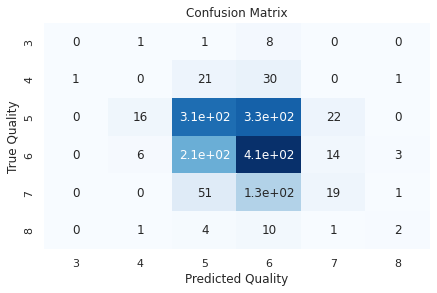

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.52      0.46      0.49       681
           6       0.45      0.64      0.53       638
           7       0.34      0.10      0.15       199
           8       0.29      0.11      0.16        18

    accuracy                           0.46      1599
   macro avg       0.27      0.22      0.22      1599
weighted avg       0.45      0.46      0.44      1599



In [ ]:
labels= [3,4,5,6,7,8]
svm = SVC(kernel='rbf', random_state=42, gamma=2200, C =10.0).fit(X_norm_r2_train, y_norm_r2_train)

y_pred = cross_val_predict( svm, X_norm_r2,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

this model is not doing well, we see that the under-represented classes get classified incorrectly.

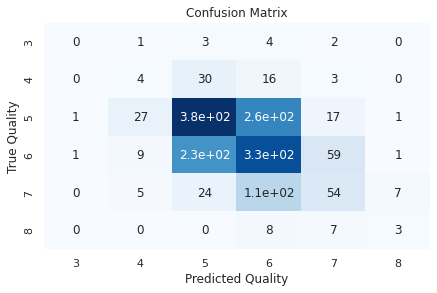

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.09      0.08      0.08        53
           5       0.57      0.56      0.56       681
           6       0.46      0.52      0.49       638
           7       0.38      0.27      0.32       199
           8       0.25      0.17      0.20        18

    accuracy                           0.48      1599
   macro avg       0.29      0.27      0.27      1599
weighted avg       0.48      0.48      0.48      1599



In [ ]:
svm = SVC(kernel='rbf', random_state=42, gamma=3.4, C =10.0).fit(X_std_r2_train, y_std_r2_train)
y_pred = cross_val_predict( svm, X_std_r2,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

here we see the same problem as before.

these models are also having problems classifying under-represented values.

Let's check other models.

once again, we see that not every class is doing well here. 

trying other models.

Now moving on to models with decision trees.

### Random Forest Classifier
Let's check selected models.

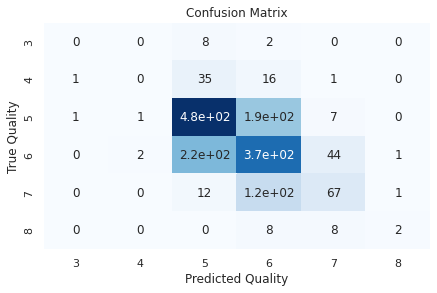

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.64      0.71      0.67       681
           6       0.53      0.58      0.55       638
           7       0.53      0.34      0.41       199
           8       0.50      0.11      0.18        18

    accuracy                           0.58      1599
   macro avg       0.37      0.29      0.30      1599
weighted avg       0.55      0.58      0.56      1599



In [ ]:
decisiontree2 = RandomForestClassifier(random_state=42, n_estimators=200).fit( X_train, y_train)

y_pred = cross_val_predict( decisiontree2, X,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

we have a model here.

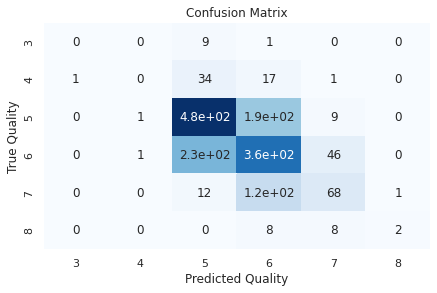

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.63      0.71      0.67       681
           6       0.52      0.57      0.55       638
           7       0.52      0.34      0.41       199
           8       0.67      0.11      0.19        18

    accuracy                           0.57      1599
   macro avg       0.39      0.29      0.30      1599
weighted avg       0.55      0.57      0.56      1599



In [ ]:
decisiontree2 = RandomForestClassifier(random_state=42, n_estimators=200).fit( X_std_train, y_std_train)

y_pred = cross_val_predict( decisiontree2, X_std,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

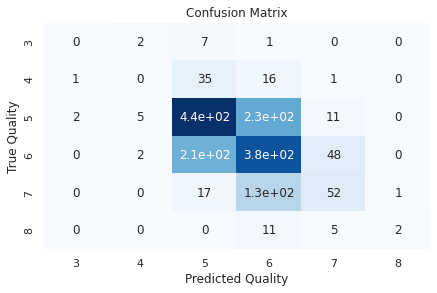

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.62      0.64      0.63       681
           6       0.49      0.59      0.54       638
           7       0.44      0.26      0.33       199
           8       0.67      0.11      0.19        18

    accuracy                           0.54      1599
   macro avg       0.37      0.27      0.28      1599
weighted avg       0.52      0.54      0.52      1599



In [ ]:
decisiontree1 = RandomForestClassifier(random_state=42, n_estimators=160).fit( X_norm_train, y_norm_train)

y_pred = cross_val_predict( decisiontree1, X_norm,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

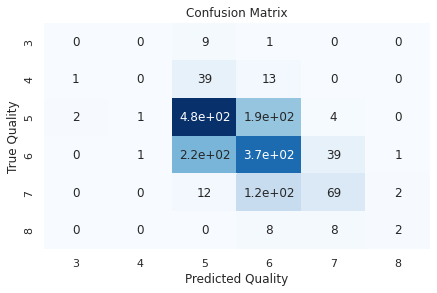

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.63      0.71      0.67       681
           6       0.53      0.58      0.56       638
           7       0.57      0.35      0.43       199
           8       0.40      0.11      0.17        18

    accuracy                           0.58      1599
   macro avg       0.36      0.29      0.30      1599
weighted avg       0.56      0.58      0.56      1599



In [ ]:
decisiontree2 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_estimators=300).fit( X_train, y_train)

y_pred = cross_val_predict( decisiontree2, X,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

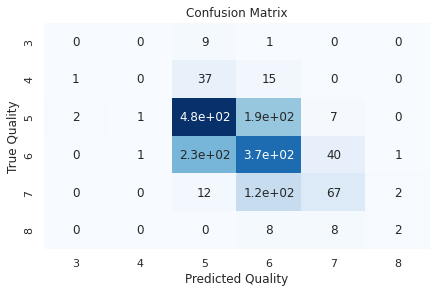

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.63      0.71      0.67       681
           6       0.53      0.58      0.55       638
           7       0.55      0.34      0.42       199
           8       0.40      0.11      0.17        18

    accuracy                           0.58      1599
   macro avg       0.35      0.29      0.30      1599
weighted avg       0.55      0.58      0.56      1599



In [ ]:
decisiontree2 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_estimators=300).fit( X_std_train, y_std_train)

y_pred = cross_val_predict( decisiontree2, X_std,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

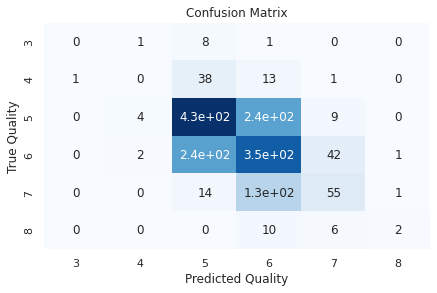

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.59      0.63      0.61       681
           6       0.48      0.55      0.51       638
           7       0.49      0.28      0.35       199
           8       0.50      0.11      0.18        18

    accuracy                           0.53      1599
   macro avg       0.34      0.26      0.28      1599
weighted avg       0.51      0.53      0.51      1599



In [ ]:
decisiontree2 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_estimators=300).fit( X_norm_train, y_norm_train)

y_pred = cross_val_predict( decisiontree2, X_norm,y, cv=10)

# Create confusion matrix
matrix = confusion_matrix(y, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=labels, columns=labels)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Quality"), plt.xlabel("Predicted Quality")
plt.show()
print(classification_report(y, y_pred, labels= [3,4,5,6,7,8]))

We have found some models here. Decisions trees and Random forests are the go to models here.